In [1]:
import pandas as pd
import os
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pmdarima as pm
import datetime
import plotly.express as px
from sklearn.metrics import mean_squared_error, r2_score
from tqdm import tqdm
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.statespace.dynamic_factor import DynamicFactor
from statsmodels.tsa.statespace.dynamic_factor import DynamicFactorResults
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.preprocessing import StandardScaler

In [2]:
def adf_test(series):
    """
    Performs the ADF test and prints the results.
    """
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    print(f"Critical Values:")
    for key, value in result[4].items():
        print(f"{key}: {value:.4f}")

In [3]:
def mape(y_true, y_pred):
    return np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true)))

In [4]:
def smape(y_true, y_pred):
    return np.mean(2 * np.abs(np.array(y_pred) - np.array(y_true)) / (np.abs(np.array(y_true)) 
                                                                      + np.abs(np.array(y_pred))))

In [5]:
def mda(y_true, y_pred):
    
    dreal = np.array(y_true[1:])-np.array(y_true[:-1])
    dpred = np.array(y_pred[1:])-np.array(y_pred[:-1])
    sign_matches = np.sign(dreal) == np.sign(dpred)
    num_matches = np.sum(sign_matches)
    return num_matches/len(dreal)

In [6]:
def mda_M(y_true, y_pred):
    dreal = np.array(y_true[3:])-np.array(y_true[:-3])
    dpred = np.array(y_pred[3:])-np.array(y_pred[:-3])
    sign_matches = np.sign(dreal) == np.sign(dpred)
    num_matches = np.sum(sign_matches)
    return num_matches/len(dreal)

In [7]:
def rmsfe(y_true, y_pred):
    answer = []
    for i in range(1,len(y_true)):
        ytrue = y_true[:i]
        ypred = y_pred[:i]
        rmse = np.sqrt(mean_squared_error(np.array(ytrue), np.array(ypred)))
        answer.append(rmse)
    return answer

In [8]:
def ofsperformance(y_true, y_pred):
    print("mean absolute error:", mean_absolute_error(np.array(y_true),
                                                         np.array(y_pred)))
    
    print("mean absolute percentage error:", mape(y_true, y_pred))
    
    print("root mean square error:", np.sqrt(mean_squared_error(np.array(y_true),
                                                                   np.array(y_pred))))
    
    print("real time root-mean-squared-forecast-error:", rmsfe(y_true,y_pred))
    
    print("mean directional accuracy:", mda(y_true, y_pred))
    
    print("whole mean directional accuracy:", mda_M(y_true, y_pred))

In [9]:
# find the paths for csv data files 
# remember to check whether the path is correct, or the import of data will be affected

rgdp_path = os.path.abspath("Q_Real GDP.csv")
ffer_path = os.path.abspath("D_Federal Funds Effective Rate.csv")
ijc_path = os.path.abspath("W_Initial jobless claims.csv")
cpi_path = os.path.abspath("M_Consumer Price Index.csv")
cs_path = os.path.abspath("M_Consumer sentiment.csv")
epi_path = os.path.abspath("M_Export price index.csv")
hs_path = os.path.abspath("M_Housing starts.csv")
ipro_path = os.path.abspath("M_Industrial Production Index.csv")
ipi_path = os.path.abspath("M_Import price index.csv")
nhs_path = os.path.abspath("M_New houses sold.csv")
rpce_growth_path = os.path.abspath("M_Real Personal Consumption Expenditure Growth Rate.csv")
ppi_path = os.path.abspath("M_Producer Price Index by Industry-Total Manufacturing Industries.csv")
rbeer_path = os.path.abspath("M_Real broad effective exchange rate.csv")
rdpi_path = os.path.abspath("M_Real Disposable Personal Income.csv")
rrfss_path = os.path.abspath("M_Real Retail and Food services sales.csv")
ur_path = os.path.abspath("M_Unemployment Rate.csv")

In [10]:
# import data

rgdp_raw = pd.read_csv(rgdp_path, index_col=['DATE'])
ffer_raw = pd.read_csv(ffer_path, index_col=['DATE'])
ijc_raw = pd.read_csv(ijc_path, index_col=['DATE'])
cpi_raw = pd.read_csv(cpi_path, index_col=['DATE'])
cs_raw = pd.read_csv(cs_path, index_col=['DATE'])
epi_raw = pd.read_csv(epi_path, index_col=['DATE'])
hs_raw = pd.read_csv(hs_path, index_col=['DATE'])
ipro_raw = pd.read_csv(ipro_path, index_col=['DATE'])
ipi_raw = pd.read_csv(ipi_path, index_col=['DATE'])
nhs_raw = pd.read_csv(nhs_path, index_col=['DATE'])
rpce_growth = pd.read_csv(rpce_growth_path, index_col=['DATE'])
ppi_raw = pd.read_csv(ppi_path, index_col=['DATE'])
rbeer_raw = pd.read_csv(rbeer_path, index_col=['DATE'])
rdpi_raw = pd.read_csv(rdpi_path, index_col=['DATE'])
rrfss_raw = pd.read_csv(rrfss_path, index_col=['DATE'])
ur_raw = pd.read_csv(ur_path, index_col=['DATE'])

In [11]:
# check missing data by the shape of time series

print("rgdp_raw shape:", rgdp_raw.shape)
print("ffer_raw shape:", ffer_raw.shape)
print("ijc_raw shape:", ijc_raw.shape)
print("cpi_raw shape:", cpi_raw.shape)
print("cs_raw shape:", cs_raw.shape)
print("epi_raw shape:", epi_raw.shape)
print("hs_raw shape:", hs_raw.shape)
print("ipro_raw shape:", ipro_raw.shape)
print("ipi_raw shape:", ipi_raw.shape)
print("nhs_raw shape:", nhs_raw.shape)
print("rpce_growth shape:", rpce_growth.shape)
print("ppi_raw shape:", ppi_raw.shape)
print("rbeer_raw shape:", rbeer_raw.shape)
print("rdpi_raw shape:", rdpi_raw.shape)
print("rrfss_raw shape:", rrfss_raw.shape)
print("ur_raw shape:", ur_raw.shape)

rgdp_raw shape: (92, 1)
ffer_raw shape: (8401, 1)
ijc_raw shape: (1201, 1)
cpi_raw shape: (276, 1)
cs_raw shape: (276, 1)
epi_raw shape: (276, 1)
hs_raw shape: (276, 1)
ipro_raw shape: (276, 1)
ipi_raw shape: (276, 1)
nhs_raw shape: (276, 1)
rpce_growth shape: (275, 1)
ppi_raw shape: (276, 1)
rbeer_raw shape: (276, 1)
rdpi_raw shape: (276, 1)
rrfss_raw shape: (276, 1)
ur_raw shape: (276, 1)


In [12]:
# pre-processing: generation of variables

# real GDP growth rate
lrgdp = np.log(rgdp_raw)
dlrgdp = lrgdp.diff()
rgdp_growth = dlrgdp * 100
rgdp_growth = rgdp_growth.dropna()
rgdp_growth = rgdp_growth.rename(columns={" Real GDP( Billions of Chained 2012 Dollars)":
                                          "Real GDP growth rate"})
# Federal Funds Effective Rate
ffer = ffer_raw.rename(columns={"DFF":"Federal Funds Effective Rate"})

# growth rate of initial job claims
lijc = np.log(ijc_raw)
dlijc = lijc.diff()
ijc_growth = dlijc * 100
ijc_growth = ijc_growth.dropna()
ijc_growth = ijc_growth.rename(columns={"ICSA":"Initial claim growth rate"})

# inflation measured by CPI
inf_cpi = cpi_raw.pct_change(periods=1) * 100
inf_cpi = inf_cpi.dropna()
inf_cpi = inf_cpi.rename(columns={"CPIAUCSL":"Inflation (CPI)"})

# consumer sentiment growth rate
cs_growth = cs_raw.pct_change(periods=1) * 100
cs_growth = cs_growth.dropna()
cs_growth = cs_growth.rename(columns={"UMCSENT":"Consumer Sentiment growth rate"})

# Export price growth rate
rep_growth = epi_raw.pct_change(periods=1) * 100
rep_growth = rep_growth.dropna()
rep_growth = rep_growth.rename(columns={"IQ":"Real export price growth"})

# housing start growth
lhs = np.log(hs_raw)
hs_growth = lhs.diff() * 100
hs_growth = hs_growth.dropna()
hs_growth = hs_growth.rename(columns={"HOUST":"Housing start growth"})

# Industrial Production index growth rate
ipro_growth = ipro_raw.pct_change(periods=1) * 100
ipro_growth = ipro_growth.dropna()
ipro_growth = ipro_growth.rename(columns={"Industrial Production: Total Index(index2017=100)":
                                          "Industrial production growth rate"})

# Import price growth rate 
rip_growth = ipi_raw.pct_change(periods=1) * 100
rip_growth = rip_growth.dropna()
rip_growth = rip_growth.rename(columns={"IR":"Real import price growth"})

# growth rate of new houses sold
lnhs = np.log(nhs_raw)
nhs_growth = lnhs.diff() * 100
nhs_growth = nhs_growth.dropna()
nhs_growth = nhs_growth.rename(columns={"HSN1F":"Growth rate for new houses sold"})

# growth rate for real Personal Consumption Expenditure
rpce_growth = rpce_growth.rename(columns={"DPCCRAM1M225NBEA":
                                          "Real Personal Consumption Expenditure Growth"})

# inflation measured by PPI
inf_ppi = ppi_raw.pct_change(periods=1) * 100
inf_ppi = inf_ppi.dropna()
inf_ppi = inf_ppi.rename(columns=
                         {"Producer Price Index by Industry: Total Manufacturing Industries(index Dec1984=100)":
                                  "Inflation (PPI)"})

# Real broad effective exchange rate
rbeer_100 = rbeer_raw.rename(columns={"RBUSBIS":"Real broad effective exchange rate"})

# Real Disposable Personal Income Growth rate
lrdpi = np.log(rdpi_raw)
rdpi_growth = lrdpi.diff() * 100
rdpi_growth = rdpi_growth.dropna()
rdpi_growth = rdpi_growth.rename(columns=
                                 {"Real Disposable Personal Income( Billions of Chained 2012 Dollars)":
                                          "Real disposal income growth"})

# Growth rate of Real Retail and Food services sales
lrrfss = np.log(rrfss_raw)
rs_growth = lrrfss.diff() * 100
rs_growth = rs_growth.dropna()
rs_growth = rs_growth.rename(columns={"RRSFS":"Growth rate of real sales"})

# Unemployment rate
ur = ur_raw

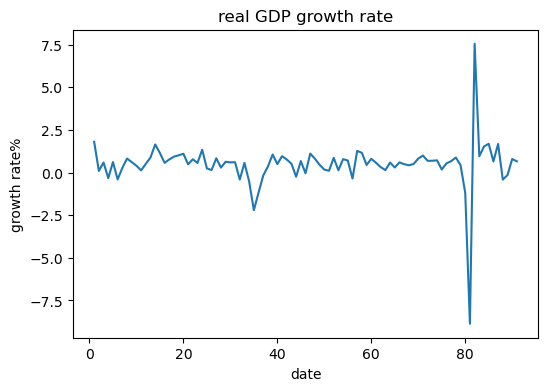

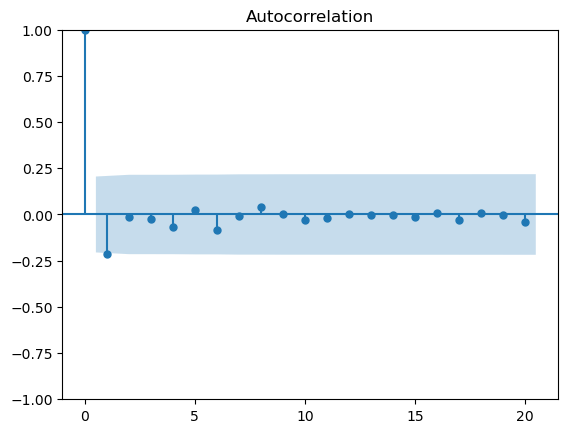

ADF Statistic: -11.7366
p-value: 0.0000
Critical Values:
1%: -3.5052
5%: -2.8942
10%: -2.5842


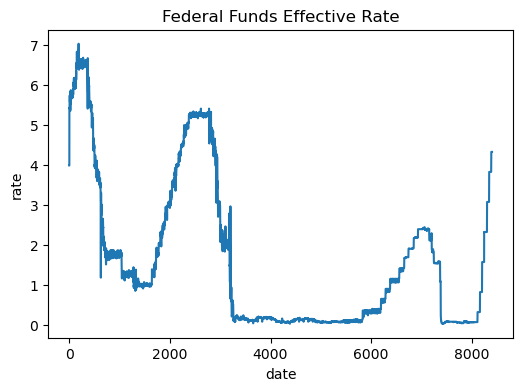

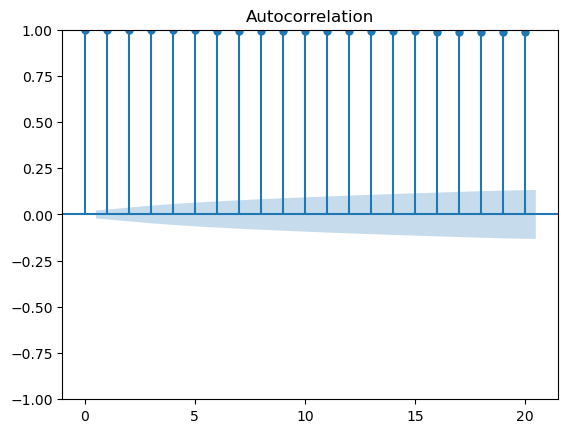

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     3176.
Date:                Thu, 06 Apr 2023   Prob (F-statistic):               0.00
Time:                        07:50:29   Log-Likelihood:                -15821.
No. Observations:                8401   AIC:                         3.165e+04
Df Residuals:                    8399   BIC:                         3.166e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3392      0.035     96.171      0.0

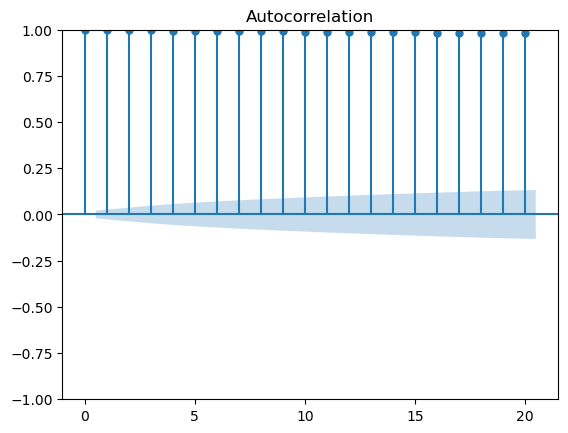

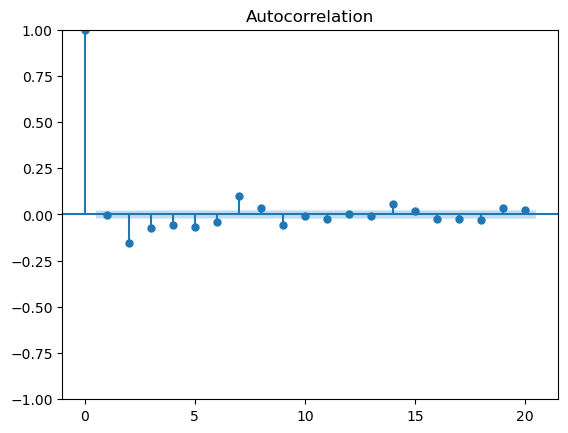

ADF Statistic: -13.8734
p-value: 0.0000
Critical Values:
1%: -3.4311
5%: -2.8619
10%: -2.5670


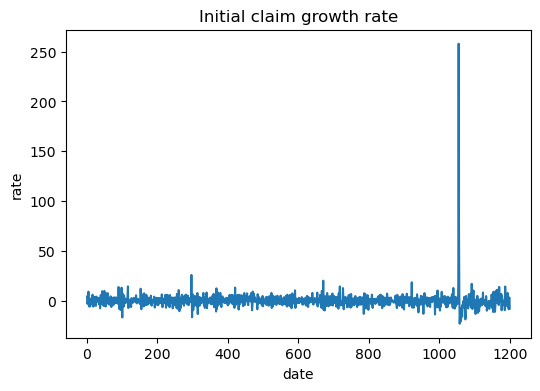

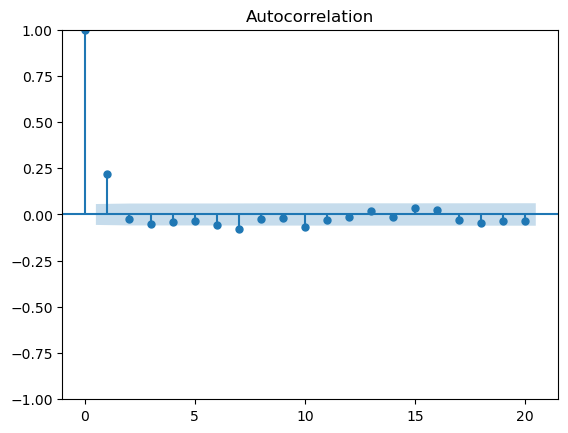

ADF Statistic: -13.1869
p-value: 0.0000
Critical Values:
1%: -3.4359
5%: -2.8640
10%: -2.5681


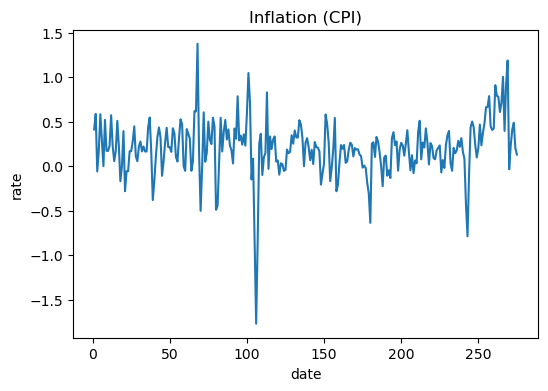

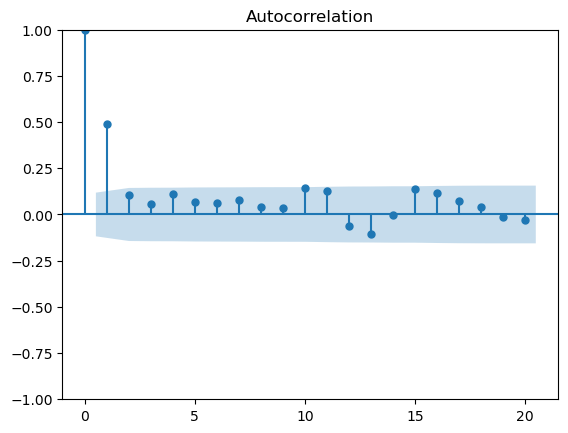

ADF Statistic: -9.9262
p-value: 0.0000
Critical Values:
1%: -3.4545
5%: -2.8722
10%: -2.5724


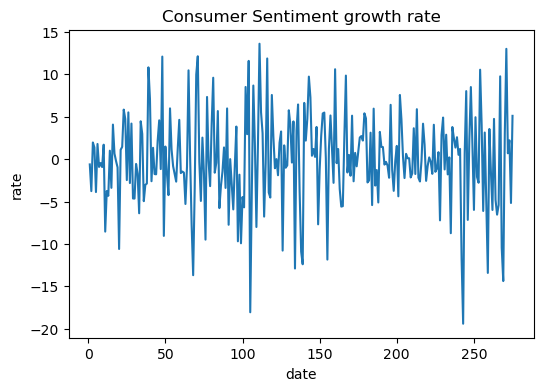

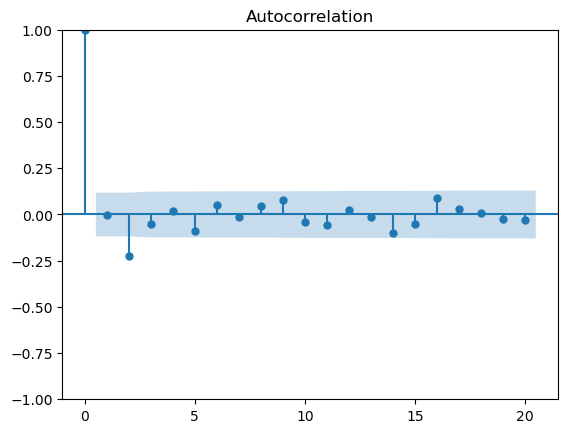

ADF Statistic: -14.6438
p-value: 0.0000
Critical Values:
1%: -3.4545
5%: -2.8722
10%: -2.5724


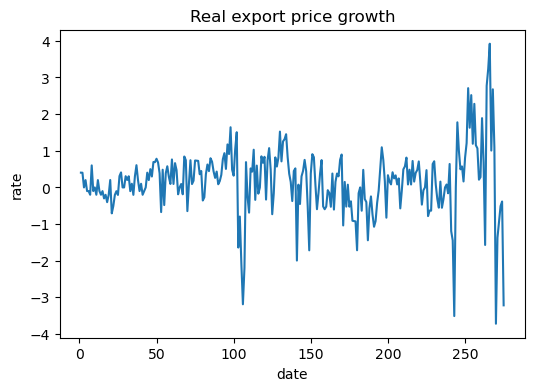

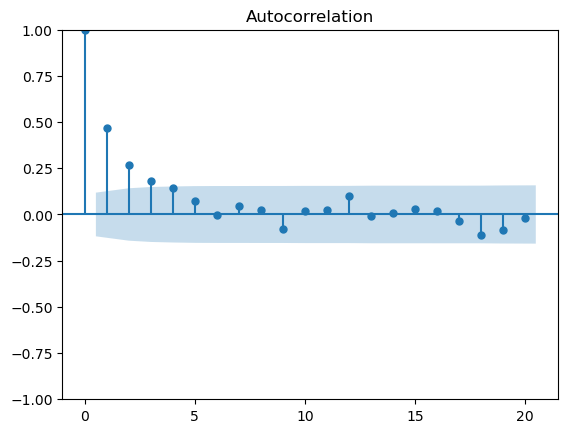

ADF Statistic: -9.2700
p-value: 0.0000
Critical Values:
1%: -3.4544
5%: -2.8721
10%: -2.5724


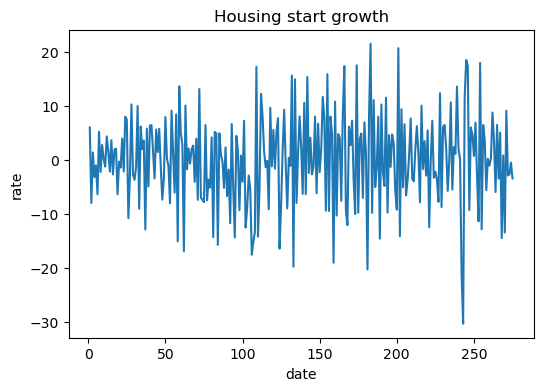

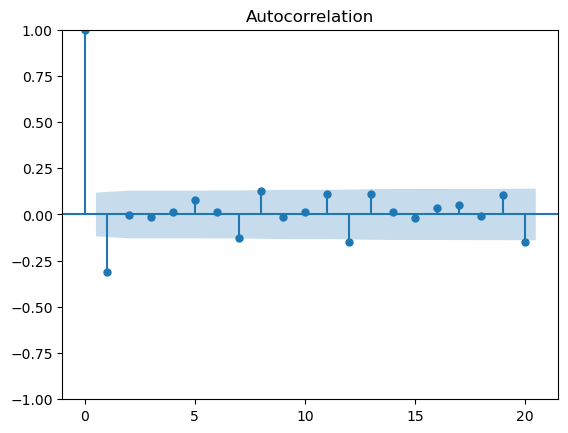

ADF Statistic: -14.8702
p-value: 0.0000
Critical Values:
1%: -3.4545
5%: -2.8722
10%: -2.5724


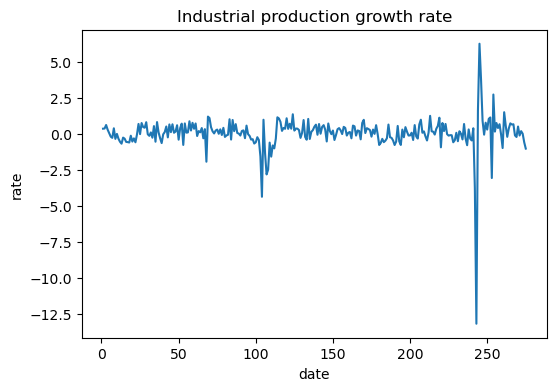

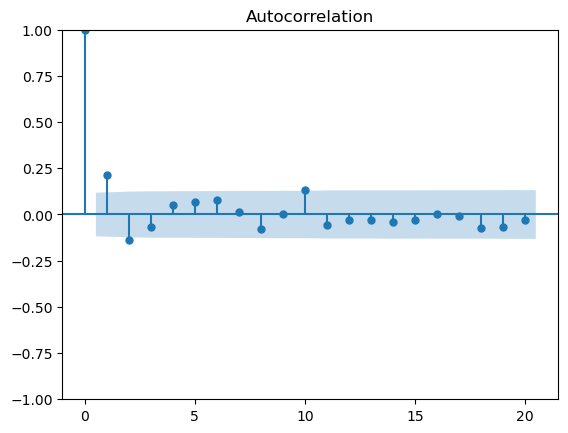

ADF Statistic: -12.4775
p-value: 0.0000
Critical Values:
1%: -3.4545
5%: -2.8722
10%: -2.5724


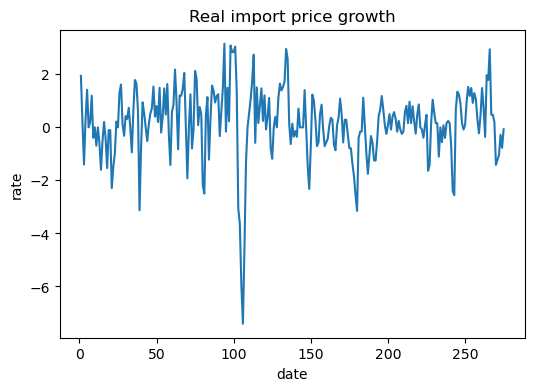

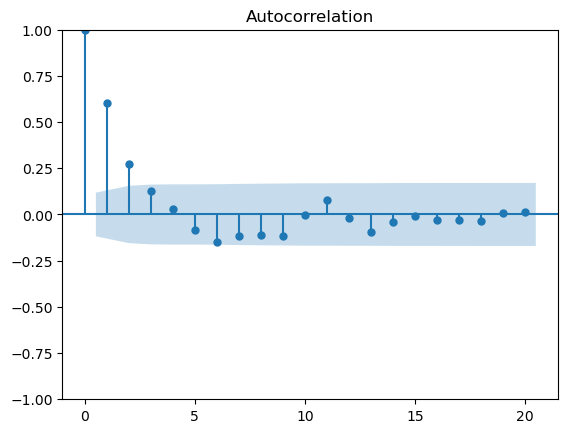

ADF Statistic: -8.4454
p-value: 0.0000
Critical Values:
1%: -3.4545
5%: -2.8722
10%: -2.5724


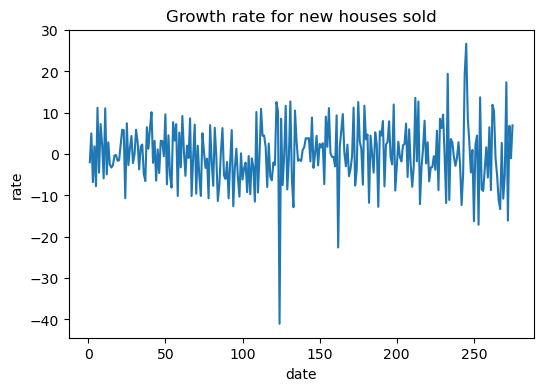

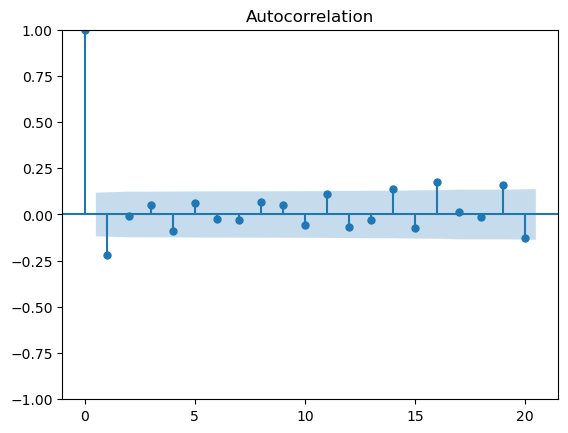

ADF Statistic: -20.5595
p-value: 0.0000
Critical Values:
1%: -3.4544
5%: -2.8721
10%: -2.5724


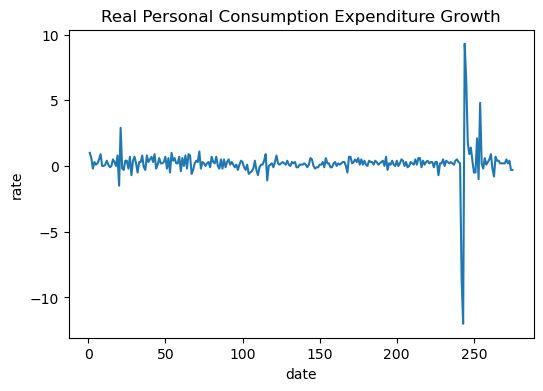

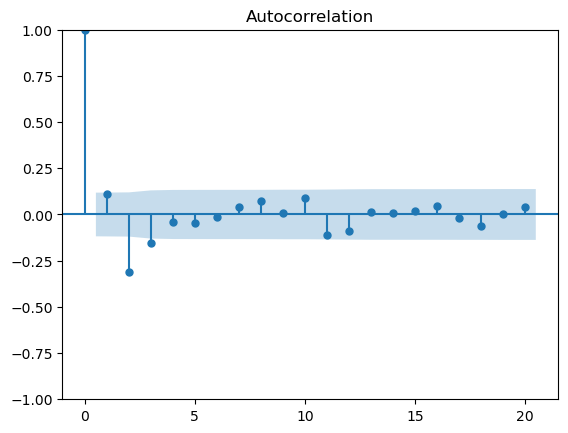

ADF Statistic: -5.9167
p-value: 0.0000
Critical Values:
1%: -3.4554
5%: -2.8726
10%: -2.5726


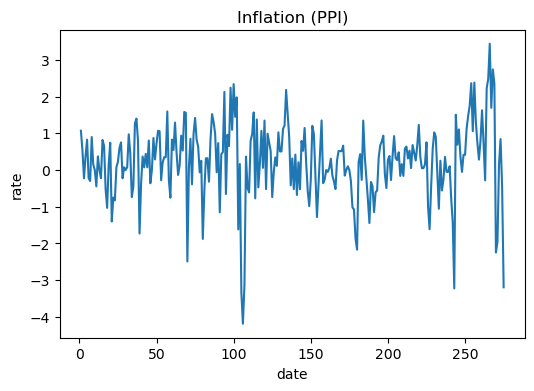

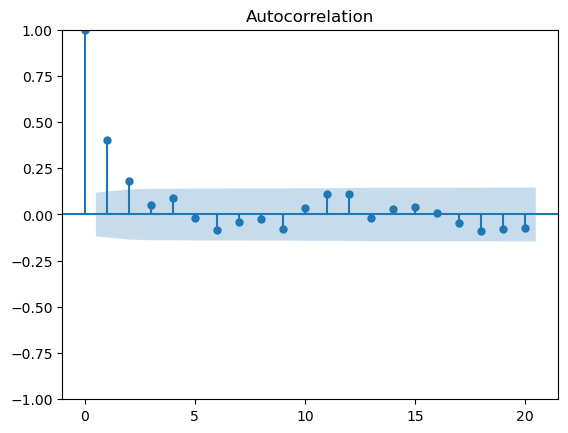

ADF Statistic: -10.2968
p-value: 0.0000
Critical Values:
1%: -3.4544
5%: -2.8721
10%: -2.5724


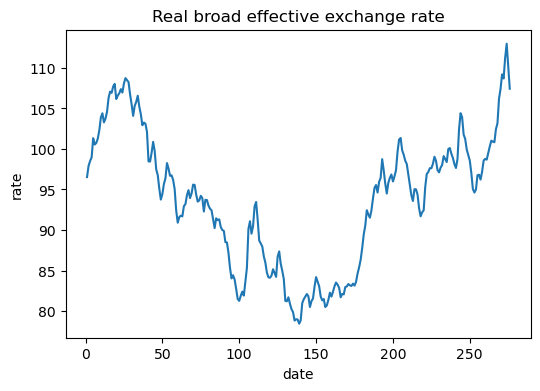

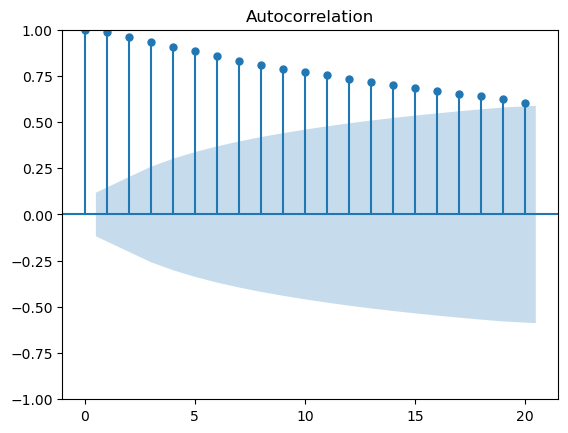

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.2975
Date:                Thu, 06 Apr 2023   Prob (F-statistic):              0.586
Time:                        07:50:35   Log-Likelihood:                -974.64
No. Observations:                 276   AIC:                             1953.
Df Residuals:                     274   BIC:                             1961.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         94.2077      1.002     94.049      0.0

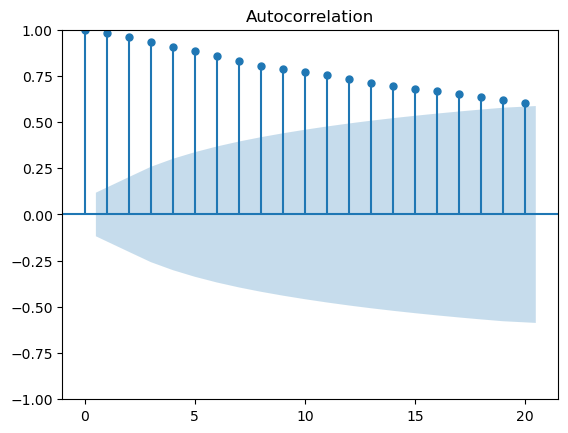

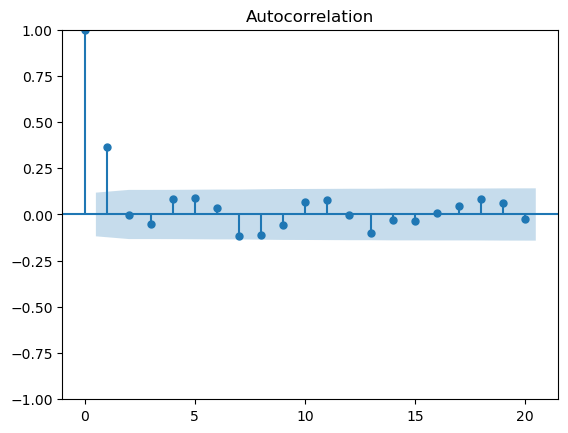

ADF Statistic: -6.9716
p-value: 0.0000
Critical Values:
1%: -3.4547
5%: -2.8723
10%: -2.5725


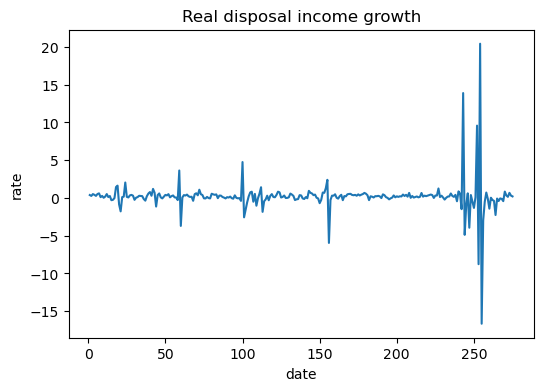

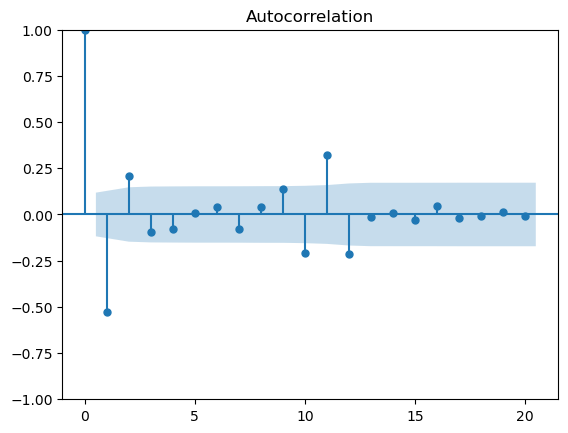

ADF Statistic: -4.2567
p-value: 0.0005
Critical Values:
1%: -3.4556
5%: -2.8726
10%: -2.5727


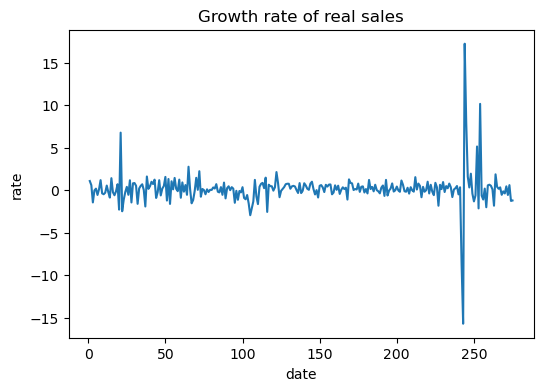

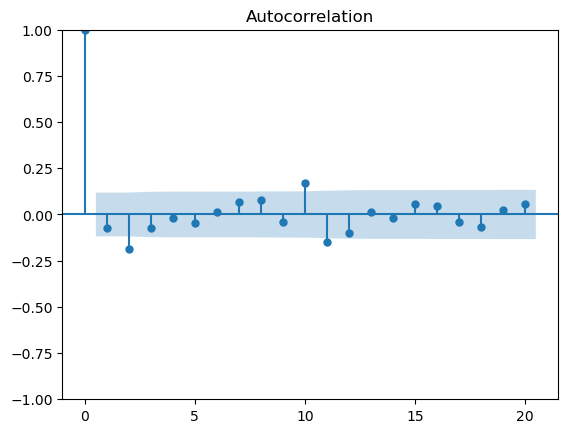

ADF Statistic: -4.5057
p-value: 0.0002
Critical Values:
1%: -3.4554
5%: -2.8726
10%: -2.5726


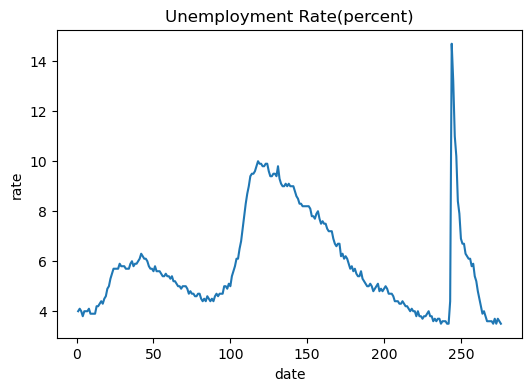

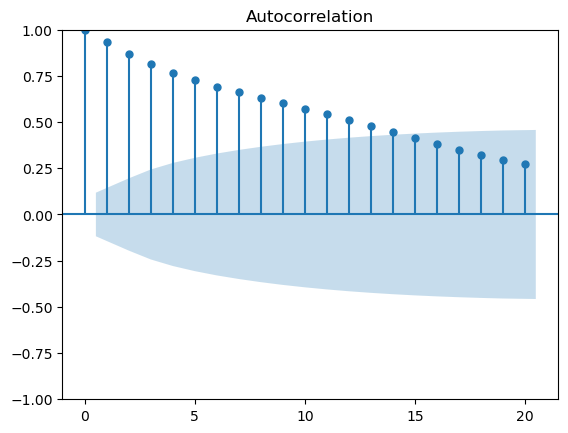

ADF Statistic: -2.8618
p-value: 0.0500
Critical Values:
1%: -3.4544
5%: -2.8721
10%: -2.5724
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.4015
Date:                Thu, 06 Apr 2023   Prob (F-statistic):              0.527
Time:                        07:50:37   Log-Likelihood:                -576.57
No. Observations:                 276   AIC:                             1157.
Df Residuals:                     274   BIC:                             1164.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

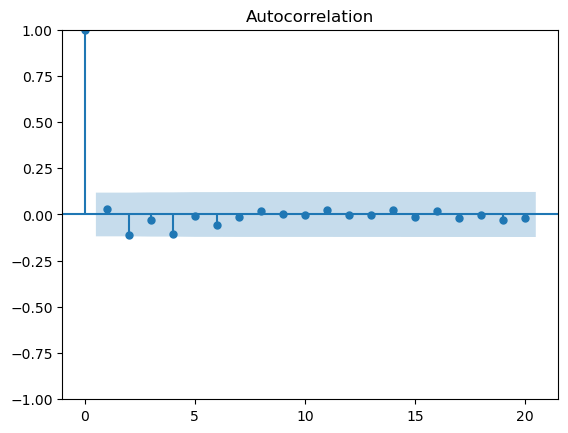

ADF Statistic: -12.8052
p-value: 0.0000
Critical Values:
1%: -3.4545
5%: -2.8722
10%: -2.5724


In [13]:
# pre-processing: plots, stationarity and unit root tests

# GDP growth rate(stationary)
  #plot of real GDP growth
fig_rgdp_growth,ax = plt.subplots(figsize=(6,4))
y1 = rgdp_growth["Real GDP growth rate"].tolist()
x1 = [i for i in range(1,len(y1)+1)]
ax.plot(x1, y1)
ax.set_title("real GDP growth rate")
ax.set_xlabel("date")
ax.set_ylabel("growth rate%")
plt.show()  
  #plot of ACF for real GDP growth(stationary)
plot_acf(y1, lags=20)
plt.show()
  #ADF test for formal check of unit roots(null reject; stationary)
adf_test(y1)


# Federal Funds Effective Rate (use dffer in the future)
  #plot of Federal Funds Effective Rate
fig_ffer,ax = plt.subplots(figsize=(6,4))
y2 = ffer["Federal Funds Effective Rate"].tolist()
x2 = [i for i in range(1,len(y2)+1)]
ax.plot(x2, y2)
ax.set_title("Federal Funds Effective Rate")
ax.set_xlabel("date")
ax.set_ylabel("rate")
plt.show()
  #plot of ACF(not stationary)
plot_acf(y2, lags=20)
plt.show()
  #check trend(significant; trending)
ffer_model = sm.OLS(y2, sm.add_constant(x2))
result2 = ffer_model.fit()
print(result2.summary())
  #remove the trend
detrend_ffer = result2.resid
  #plot ACF for detrend ffer(still not stationary)
plot_acf(detrend_ffer, lags=20)
plt.show()
  #Choose an alternative: first differencing
dffer = ffer.diff()
dffer = dffer.dropna()
y2 = dffer["Federal Funds Effective Rate"].tolist()
x2 = [i for i in range(1,len(y2)+1)]
  #plot ACF for dffer(tend to be stationary)
plot_acf(y2, lags=20)
plt.show()
  #ADF test for formal check of unit roots(null reject; dffer stationary)
adf_test(y2)


# growth rate of initial job claims(stationary)
  #plot 
fig_ijc_growth,ax = plt.subplots(figsize=(6,4))
y3 = ijc_growth["Initial claim growth rate"].tolist()
x3 = [i for i in range(1,len(y3)+1)]
ax.plot(x3, y3)
ax.set_title("Initial claim growth rate")
ax.set_xlabel("date")
ax.set_ylabel("rate")
plt.show()  
  #plot of ACF(stationary)
plot_acf(y3, lags=20)
plt.show()
  #ADF test for formal check of unit roots(null reject; stationary)
adf_test(y3)


# inflation measured by CPI(stationary)
  #plot 
fig_inf_cpi,ax = plt.subplots(figsize=(6,4))
y4 = inf_cpi["Inflation (CPI)"].tolist()
x4 = [i for i in range(1,len(y4)+1)]
ax.plot(x4, y4)
ax.set_title("Inflation (CPI)")
ax.set_xlabel("date")
ax.set_ylabel("rate")
plt.show() 
  #plot of ACF(stationary)
plot_acf(y4, lags=20)
plt.show()
  #ADF test for formal check of unit roots(null reject; stationary)
adf_test(y4)


# consumer sentiment growth rate(stationary)
  #plot 
fig_cs_growth,ax = plt.subplots(figsize=(6,4))
y5 = cs_growth["Consumer Sentiment growth rate"].tolist()
x5 = [i for i in range(1,len(y5)+1)]
ax.plot(x5, y5)
ax.set_title("Consumer Sentiment growth rate")
ax.set_xlabel("date")
ax.set_ylabel("rate")
plt.show()  
  #plot of ACF(stationary)
plot_acf(y5, lags=20)
plt.show()
  #ADF test for formal check of unit roots(null reject; stationary)
adf_test(y5)


# export price growth (stationary)
  #plot 
fig_rep_growth,ax = plt.subplots(figsize=(6,4))
y6 = rep_growth["Real export price growth"].tolist()
x6 = [i for i in range(1,len(y6)+1)]
ax.plot(x6, y6)
ax.set_title("Real export price growth")
ax.set_xlabel("date")
ax.set_ylabel("rate")
plt.show()  
  #plot of ACF(tend to be stationary)
plot_acf(y6, lags=20)
plt.show()
  #ADF test for formal check of unit roots(null reject; stationary)
adf_test(y6)


# housing start growth(stationary)
  #plot 
fig_hs_growth,ax = plt.subplots(figsize=(6,4))
y7 = hs_growth["Housing start growth"].tolist()
x7 = [i for i in range(1,len(y7)+1)]
ax.plot(x7, y7)
ax.set_title("Housing start growth")
ax.set_xlabel("date")
ax.set_ylabel("rate")
plt.show()  
  #plot of ACF(tend to be stationary)
plot_acf(y7, lags=20)
plt.show()
  #ADF test for formal check of unit roots(null reject; stationary)
adf_test(y7)


# Industrial Production growth rate(stationary)
  #plot 
fig_ipro_growth,ax = plt.subplots(figsize=(6,4))
y8 = ipro_growth["Industrial production growth rate"].tolist()
x8 = [i for i in range(1,len(y8)+1)]
ax.plot(x8, y8)
ax.set_title("Industrial production growth rate")
ax.set_xlabel("date")
ax.set_ylabel("rate")
plt.show()  
  #plot of ACF(tend to be stationary)
plot_acf(y8, lags=20)
plt.show()
  #ADF test for formal check of unit roots(null reject; stationary)
adf_test(y8)


# Import price growth(stationary)
  #plot 
fig_rip_growth,ax = plt.subplots(figsize=(6,4))
y9 = rip_growth["Real import price growth"].tolist()
x9 = [i for i in range(1,len(y9)+1)]
ax.plot(x9, y9)
ax.set_title("Real import price growth")
ax.set_xlabel("date")
ax.set_ylabel("rate")
plt.show()  
  #plot of ACF(tend to be stationary)
plot_acf(y9, lags=20)
plt.show()
  #ADF test for formal check of unit roots(null reject; stationary)
adf_test(y9)


# Growth rate of new houses sold(stationary)
  #plot 
fig_nhs_growth,ax = plt.subplots(figsize=(6,4))
y10 = nhs_growth["Growth rate for new houses sold"].tolist()
x10 = [i for i in range(1,len(y10)+1)]
ax.plot(x10, y10)
ax.set_title("Growth rate for new houses sold")
ax.set_xlabel("date")
ax.set_ylabel("rate")
plt.show()  
  #plot of ACF(tend to be stationary)
plot_acf(y10, lags=20)
plt.show()
  #ADF test for formal check of unit roots(null reject; stationary)
adf_test(y10)


# Growth rate for real Personal Consumption Expenditure(stationary)
  #plot 
fig_rpce_growth,ax = plt.subplots(figsize=(6,4))
y11 = rpce_growth["Real Personal Consumption Expenditure Growth"].tolist()
x11 = [i for i in range(1,len(y11)+1)]
ax.plot(x11, y11)
ax.set_title("Real Personal Consumption Expenditure Growth")
ax.set_xlabel("date")
ax.set_ylabel("rate")
plt.show()  
  #plot of ACF(stationary)
plot_acf(y11, lags=20)
plt.show()
  #ADF test for formal check of unit roots(null reject; stationary)
adf_test(y11)


# Inflation measured by PPI(stationary)
  #plot 
fig_inf_ppi,ax = plt.subplots(figsize=(6,4))
y12 = inf_ppi["Inflation (PPI)"].tolist()
x12 = [i for i in range(1,len(y12)+1)]
ax.plot(x12, y12)
ax.set_title("Inflation (PPI)")
ax.set_xlabel("date")
ax.set_ylabel("rate")
plt.show()  
  #plot of ACF(stationary)
plot_acf(y12, lags=20)
plt.show()
  #ADF test for formal check of unit roots(null reject; stationary)
adf_test(y12)


# Real broad effective exchange rate(use drbeer in the future)
  #plot 
fig_rbeer_100,ax = plt.subplots(figsize=(6,4))
y13 = rbeer_100["Real broad effective exchange rate"].tolist()
x13 = [i for i in range(1,len(y13)+1)]
ax.plot(x13, y13)
ax.set_title("Real broad effective exchange rate")
ax.set_xlabel("date")
ax.set_ylabel("rate")
plt.show()  
  #plot of ACF(not stationary)
plot_acf(y13, lags=20)
plt.show()
  #check trend(significant; trending)
rbeer_100_model = sm.OLS(y13, sm.add_constant(x13))
result13 = rbeer_100_model.fit()
print(result13.summary())
  #remove the trend
detrend_rbeer_100 = result13.resid
  #plot ACF for detrend ffer(still not stationary)
plot_acf(detrend_rbeer_100, lags=20)
plt.show()
  #Choose an alternative: first differencing
drbeer = rbeer_100.diff()
drbeer = drbeer.dropna()
y13 = drbeer["Real broad effective exchange rate"].tolist()
x13 = [i for i in range(1,len(y13)+1)]
  #plot ACF for dffer(stationary)
plot_acf(y13, lags=20)
plt.show()
  #ADF test for formal check of unit roots(null reject; drbeer stationary)
adf_test(y13)


# Real Disposable Personal Income Growth rate(stationary)
  #plot 
fig_rdpi_growth,ax = plt.subplots(figsize=(6,4))
y14 = rdpi_growth["Real disposal income growth"].tolist()
x14 = [i for i in range(1,len(y14)+1)]
ax.plot(x14, y14)
ax.set_title("Real disposal income growth")
ax.set_xlabel("date")
ax.set_ylabel("rate")
plt.show()  
  #plot of ACF(tend to be stationary)
plot_acf(y14, lags=20)
plt.show()
  #ADF test for formal check of unit roots(null reject; stationary)
adf_test(y14)


# Growth rate of Real Retail and Food services sales(stationary)
  #plot 
fig_rs_growth,ax = plt.subplots(figsize=(6,4))
y15 = rs_growth["Growth rate of real sales"].tolist()
x15 = [i for i in range(1,len(y15)+1)]
ax.plot(x15, y15)
ax.set_title("Growth rate of real sales")
ax.set_xlabel("date")
ax.set_ylabel("rate")
plt.show()  
  #plot of ACF(stationary)
plot_acf(y15, lags=20)
plt.show()
  #ADF test for formal check of unit roots(null reject; stationary)
adf_test(y15)


# Unemployment rate(use dur in the future)
  #plot 
fig_ur,ax = plt.subplots(figsize=(6,4))
y16 = ur["Unemployment Rate(percent)"].tolist()
x16 = [i for i in range(1,len(y16)+1)]
ax.plot(x16, y16)
ax.set_title("Unemployment Rate(percent)")
ax.set_xlabel("date")
ax.set_ylabel("rate")
plt.show()  
  #plot of ACF(not stationary)
plot_acf(y16, lags=20)
plt.show()
  #ADF test for formal check of unit roots(p-value=0.05; not stationary)
adf_test(y16)
  #check trend(not significant; not trending)
ur_model = sm.OLS(y16, sm.add_constant(x16))
result16 = ur_model.fit()
print(result16.summary())
  #first differencing
dur = ur.diff()
dur = dur.dropna()
y16 = dur["Unemployment Rate(percent)"].tolist()
x16 = [i for i in range(1,len(y16)+1)]
  #plot ACF for dffer(stationary)
plot_acf(y16, lags=20)
plt.show()
  #ADF test for formal check of unit roots(null reject; dur stationary)
adf_test(y16)

In [14]:
rgdp_raw
rgdp_raw.index = pd.date_range("2000-01-01", "2023-01-01", freq="Q")

fig = px.line(rgdp_raw)

fig.show() 

In [15]:
ur

Unemployment Rate(percent)
DATE                                  
01/01/2000                         4.0
01/02/2000                         4.1
01/03/2000                         4.0
01/04/2000                         3.8
01/05/2000                         4.0
...                                ...
01/08/2022                         3.7
01/09/2022                         3.5
01/10/2022                         3.7
01/11/2022                         3.6
01/12/2022                         3.5

[276 rows x 1 columns]

In [16]:
# Combine data with same frequency into a single dataframe
  # Monthly data    
indexM = pd.date_range("2000-02-01", "2023-01-01", freq="M")

M_data = {"Inflation (CPI)":y4, "Consumer Sentiment growth":y5, "Real export price growth":y6,
  
        "Housing start growth":y7, "Industrial production growth rate":y8, 
        "Real import price growth":y9, "Growth rate for new houses sold":y10, 
        "Real Personal Consumption Expenditure Growth":y11, "Inflation (PPI)":y12,
       "drbeer":y13, "Real disposal income growth":y14, 
       "Growth rate of real sales":y15, "dur":y16}

combined_m = pd.DataFrame(M_data, index=indexM)
  # No need to combine weekly and daily data, as only one series for each frequency
    
    
# change the index (date format)
  # GDP published at the end of each quarter
indexQ = pd.date_range("2000-02-01", "2022-10-01", freq="Q").shift(+1, freq="Q")
Q_data = {"RGDP growth":y1}
y_total = pd.DataFrame(Q_data, index=indexQ)
  # Weekly data published at the end of each week (7th)
indexW = pd.date_range(start="2000-01-08", end="2023-01-01", freq="W").shift(-1, freq="D")
W_data = pd.DataFrame({"Initial claim growth rate":y3}, index=indexW)  
  # Daily published
indexD = pd.date_range(start="2000-01-02", end="2022-12-31", freq='D')
D_data = pd.DataFrame({"dffer":y2}, index=indexD)

Best model for Inflation (CPI):  ARIMA(0,0,3)(0,0,0)[0] intercept
Best model for Consumer Sentiment growth:  ARIMA(0,0,3)(0,0,0)[0]          
Best model for Real export price growth:  ARIMA(1,0,1)(0,0,0)[0]          
Best model for Housing start growth:  ARIMA(2,0,2)(0,0,0)[0]          
Best model for Industrial production growth rate:  ARIMA(2,0,2)(0,0,0)[0]          
Best model for Real import price growth:  ARIMA(1,0,1)(0,0,0)[0]          
Best model for Growth rate for new houses sold:  ARIMA(2,0,3)(0,0,0)[0]          
Best model for Real Personal Consumption Expenditure Growth:  ARIMA(0,1,2)(0,0,0)[0]          
Best model for Inflation (PPI):  ARIMA(1,0,0)(0,0,0)[0] intercept
Best model for drbeer:  ARIMA(0,0,1)(0,0,0)[0]          
Best model for Real disposal income growth:  ARIMA(2,0,2)(0,0,0)[0] intercept
Best model for Growth rate of real sales:  ARIMA(1,0,0)(0,0,0)[0] intercept
Best model for dur:  ARIMA(0,1,2)(0,0,0)[0]          
Best model for Initial claim growth rate:  AR

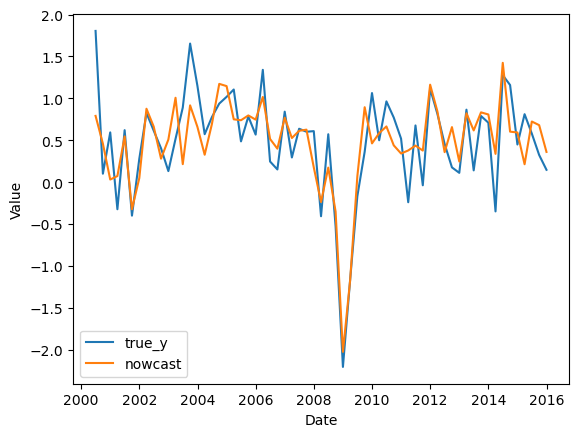

In [17]:
#Simple Bridge Equqtions: preparing initial models#

# list all initial training sets classified by frequency
# initial training set: all data published before 2016-01-31
y_train = y_total.loc[:"2015-12-31"]

X_train_M = combined_m.loc[:"2016-01-01"] 
X_train_D = D_data.loc[:"2015-12-31"]
X_train_W = W_data.loc[:"2016-01-01"]

# train ARIMA model for each indicator (initial model)
  # monthly indicator
arima_M = []
for col in X_train_M.columns:
    data = X_train_M[col]
    model = pm.auto_arima(data, seasonal=False, suppress_warnings=True, stepwise=True)
    arima_M.append(model)
    print(f"Best model for {col}:", model)
    # print(model.summary())  #to check the details delete first "#"
    
  # weekly indicator
arima_W = []
for col in X_train_W.columns:
    data = X_train_W[col]
    model = pm.auto_arima(data, seasonal=False, suppress_warnings=True, stepwise=True)
    arima_W.append(model)
    print(f"Best model for {col}:", model)
    #print(model.summary())  #to check the details delete first "#"
    
  # daily indicator
arima_D = []
for col in X_train_D.columns:
    data = X_train_D[col]
    model = pm.auto_arima(data, seasonal=False, suppress_warnings=True, stepwise=True)
    arima_D.append(model)
    print(f"Best model for {col}:", model)
    #print(model.summary())  #to check the details delete first "#"
    
# train bridge equation (initial model)
  # aggregate high frequency data to quarterly
X_train_MQ = X_train_M.resample("Q").mean()
X_train_MQ = X_train_MQ.drop(index=["2000-03-31"]) 

X_train_WQ = X_train_W.resample("Q").mean()   
X_train_WQ = X_train_WQ.drop(index=["2000-03-31"])   

X_train_DQ = X_train_D.resample("Q").mean()   
X_train_DQ = X_train_DQ.drop(index=["2000-03-31"]) 
  # combine dataframe for quarterly training set
X_train = pd.concat([X_train_MQ, X_train_WQ, X_train_DQ], axis=1)
X_train = sm.add_constant(X_train)
bridgemodel = sm.OLS(y_train["RGDP growth"].tolist(), X_train)
results_bridge = bridgemodel.fit(cov_type='HAC', cov_kwds={'maxlags': 4})
print(results_bridge.summary())

  # in sample performance
insample_pred_bridge = results_bridge.predict(X_train)
predicted = insample_pred_bridge.values

insample_bridge = pd.DataFrame(predicted, index=y_train.index)
plt.plot(y_train['RGDP growth'], label='true_y')
plt.plot(insample_bridge, label='nowcast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [18]:
r2_bridge = r2_score(y_train["RGDP growth"], insample_pred_bridge)
r2_bridge
mse_bridge = mean_squared_error(y_train["RGDP growth"], insample_pred_bridge)
mse_bridge

0.12484464209565779

In [19]:
#Simple Bridge Equqtions#
   # out of sample performance


true_y_Q = y_total.loc["2016-01-01":]
true_y_Q.index = true_y_Q.index.shift(-3, freq = "MS")
y_inter1 = true_y_Q.resample("M").ffill()
y_inter2 = pd.DataFrame({"RGDP growth": true_y_Q.loc["2022-10-01"].item()}, 
                        index = combined_m.loc["2022-11-01":].index)
true_y_M = pd.concat([y_inter1, y_inter2])

nowcast_M = []
MSE = []
test_size = len(combined_m.loc["2016-01-01":])
train_end = combined_m.index.get_loc("2015-12-31")

for i in tqdm(range(1, test_size+1),desc='progress bar'): 
    
    # generate timestep for sets
    # current_month is the end date of the month, so DWM data known
    current_month_index = train_end + i
    current_month = combined_m.index[current_month_index]
    start_of_month = current_month - pd.offsets.MonthBegin(1) 
    
    # generate current training set
    X_train_M = combined_m.loc[:current_month]
    X_train_W = W_data.loc[:current_month]
    X_train_D = D_data.loc[:current_month]
    
    if (i%3 == 1) or (i%3 == 2):  #current month is the first or second month of the current quarter
        
        target_month_index = current_month_index + (3 - i%3) 
        target_month = combined_m.index[target_month_index]
        start_of_quarter = target_month - pd.offsets.MonthBegin(3)        
        next_day_index = D_data.index.get_loc(current_month) + 1
        next_day = D_data.index[next_day_index]
        
        # known information for current quarter
        X_known_M = combined_m.loc[start_of_quarter:current_month]
        X_known_W = W_data.loc[start_of_quarter:current_month]
        X_known_D = D_data.loc[start_of_quarter:current_month] 
        
        #predictions for daily data needed
        model = arima_D[0].update(X_train_D)
        num_steps = len(D_data.loc[current_month:target_month])-1
        forecast_D = model.predict(num_steps)
        indexd = pd.date_range(start=next_day, end=target_month, freq="D")
        f_D = pd.DataFrame({"dffer":forecast_D}, index=indexd)
        
        #predictions for weekly data needed
        model = arima_W[0].update(X_train_W)
        f_W = W_data.loc[(W_data.index > current_month) & (W_data.index <= target_month)]
        num_steps = len(f_W)
        forecast_W = model.predict(num_steps)
        f_W = pd.DataFrame({"Initial claim growth rate":forecast_W}, index = f_W.index)
        
        #predictions for monthly data needed
        t = 0
        indexm = combined_m.index[current_month_index+1 : target_month_index+1]
        f_M = pd.DataFrame(index=indexm, columns= X_train_M.columns)
        
        for col in X_train_M.columns:
            data = X_train_M[col]
            model = arima_M[t].update(data)
            num_steps = 3 - i%3
            forecast_M = model.predict(num_steps)
            f_M[col] = forecast_M
            t = t + 1
        
        # Combine the predictions and the data given in test set for the current quarter
        forecastD = pd.concat([X_known_D, f_D]) 
        forecastW = pd.concat([X_known_W, f_W]) 
        forecastM = pd.concat([X_known_M, f_M]) 
        
        # lower frequency
        nowcastDQ = forecastD.resample("Q").mean()
        nowcastWQ = forecastW.resample("Q").mean()
        nowcastMQ = forecastM.resample("Q").mean()
        constant = pd.DataFrame({"const": [1] * len(nowcastMQ.index)}, index=nowcastMQ.index)
        
        # combine set and produce nowcast
        nowcast = pd.concat([constant, nowcastMQ, nowcastWQ, nowcastDQ], axis=1)
        prediction = results_bridge.predict(nowcast)
        predicted = prediction.values.item()
        nowcast_M.append(predicted)
        # record MSE
        true_rgdp_growth = y_total.loc[target_month]
        mse = mean_squared_error([true_rgdp_growth], [prediction])
        MSE.append(mse)
        
    else:  # current month is the end of the quarter
        start_of_quarter = current_month - pd.offsets.MonthBegin(3)
        
        # known information for current quarter
        X_known_M = combined_m.loc[start_of_quarter:current_month]
        X_known_W = W_data.loc[start_of_quarter:current_month]
        X_known_D = D_data.loc[start_of_quarter:current_month] 
        
        # lower frequency
        nowcastDQ = X_known_D.resample("Q").mean()
        nowcastWQ = X_known_W.resample("Q").mean()
        nowcastMQ = X_known_M.resample("Q").mean()
        constant = pd.DataFrame({"const": [1] * len(nowcastMQ.index)}, index=nowcastMQ.index)
        
        # combine set and produce nowcast
        nowcast = pd.concat([constant, nowcastMQ, nowcastWQ, nowcastDQ], axis=1)
        prediction = results_bridge.predict(nowcast)
        predicted = prediction.values.item()
        nowcast_M.append(predicted)
        # record MSE
        true_rgdp_growth = y_total.loc[current_month]
        mse = mean_squared_error([true_rgdp_growth], [prediction])
        MSE.append(mse)
        
    if i%12 == 0: # retune models every two years
        
        arima_M = []
        for col in X_train_M.columns:
            data = X_train_M[col]
            model = pm.auto_arima(data, seasonal=False, suppress_warnings=True, stepwise=True)
            arima_M.append(model)
            print(f"Best model for {col}:", model)
            
        arima_W = []
        for col in X_train_W.columns:
            data = X_train_W[col]
            model = pm.auto_arima(data, seasonal=False, suppress_warnings=True, stepwise=True)
            arima_W.append(model)
            print(f"Best model for {col}:", model)
        
        arima_D = []
        for col in X_train_D.columns:
            data = X_train_D[col]
            model = pm.auto_arima(data, seasonal=False, suppress_warnings=True, stepwise=True)
            arima_D.append(model)
            print(f"Best model for {col}:", model)
            
        X_train_MQ = X_train_M.resample("Q").mean()
        X_train_MQ = X_train_MQ.drop(index=["2000-03-31"]) 
        X_train_WQ = X_train_W.resample("Q").mean()   
        X_train_WQ = X_train_WQ.drop(index=["2000-03-31"])   
        X_train_DQ = X_train_D.resample("Q").mean()   
        X_train_DQ = X_train_DQ.drop(index=["2000-03-31"]) 
        
        y_train = y_total.loc[:current_month]
        X_train = pd.concat([X_train_MQ, X_train_WQ, X_train_DQ], axis=1)
        X_train = sm.add_constant(X_train)
        bridgemodel = sm.OLS(y_train["RGDP growth"].tolist(), X_train)
        results_bridge = bridgemodel.fit(cov_type='HAC', cov_kwds={'maxlags': 4})
        print(results_bridge.summary())

progress bar:  13%|███▊                         | 11/84 [02:22<18:54, 15.54s/it]

Best model for Inflation (CPI):  ARIMA(2,0,0)(0,0,0)[0] intercept
Best model for Consumer Sentiment growth:  ARIMA(0,0,3)(0,0,0)[0]          
Best model for Real export price growth:  ARIMA(1,0,1)(0,0,0)[0]          
Best model for Housing start growth:  ARIMA(2,0,2)(0,0,0)[0]          
Best model for Industrial production growth rate:  ARIMA(2,0,2)(0,0,0)[0]          
Best model for Real import price growth:  ARIMA(1,0,1)(0,0,0)[0]          
Best model for Growth rate for new houses sold:  ARIMA(0,0,1)(0,0,0)[0]          
Best model for Real Personal Consumption Expenditure Growth:  ARIMA(1,0,2)(0,0,0)[0] intercept
Best model for Inflation (PPI):  ARIMA(1,0,0)(0,0,0)[0] intercept
Best model for drbeer:  ARIMA(1,0,2)(0,0,0)[0]          
Best model for Real disposal income growth:  ARIMA(2,0,2)(0,0,0)[0] intercept
Best model for Growth rate of real sales:  ARIMA(2,0,2)(0,0,0)[0]          
Best model for dur:  ARIMA(0,1,2)(0,0,0)[0]          
Best model for Initial claim growth rate:  AR

progress bar:  14%|████▏                        | 12/84 [04:04<44:25, 37.02s/it]

Best model for dffer:  ARIMA(1,0,2)(0,0,0)[0] intercept
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     56.43
Date:                Thu, 06 Apr 2023   Prob (F-statistic):           2.16e-26
Time:                        07:56:21   Log-Likelihood:                -23.579
No. Observations:                  67   AIC:                             79.16
Df Residuals:                      51   BIC:                             114.4
Df Model:                          15                                         
Covariance Type:                  HAC                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------

progress bar:  27%|███████▉                     | 23/84 [06:30<17:12, 16.93s/it]

Best model for Inflation (CPI):  ARIMA(2,0,0)(0,0,0)[0] intercept
Best model for Consumer Sentiment growth:  ARIMA(0,0,3)(0,0,0)[0]          
Best model for Real export price growth:  ARIMA(1,0,1)(0,0,0)[0]          
Best model for Housing start growth:  ARIMA(0,0,3)(0,0,0)[0]          
Best model for Industrial production growth rate:  ARIMA(2,0,2)(0,0,0)[0]          
Best model for Real import price growth:  ARIMA(1,0,1)(0,0,0)[0]          
Best model for Growth rate for new houses sold:  ARIMA(1,0,2)(0,0,0)[0]          
Best model for Real Personal Consumption Expenditure Growth:  ARIMA(1,0,2)(0,0,0)[0] intercept
Best model for Inflation (PPI):  ARIMA(1,0,0)(0,0,0)[0] intercept
Best model for drbeer:  ARIMA(1,0,2)(0,0,0)[0]          
Best model for Real disposal income growth:  ARIMA(2,0,2)(0,0,0)[0] intercept
Best model for Growth rate of real sales:  ARIMA(1,0,2)(0,0,0)[0]          
Best model for dur:  ARIMA(0,1,2)(0,0,0)[0]          
Best model for Initial claim growth rate:  AR

progress bar:  29%|████████▎                    | 24/84 [07:25<26:00, 26.02s/it]

Best model for dffer:  ARIMA(1,0,2)(0,0,0)[0]          
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     64.98
Date:                Thu, 06 Apr 2023   Prob (F-statistic):           1.99e-29
Time:                        07:59:42   Log-Likelihood:                -24.294
No. Observations:                  71   AIC:                             80.59
Df Residuals:                      55   BIC:                             116.8
Df Model:                          15                                         
Covariance Type:                  HAC                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------

progress bar:  42%|████████████                 | 35/84 [08:19<05:19,  6.52s/it]

Best model for Inflation (CPI):  ARIMA(2,0,0)(0,0,0)[0] intercept
Best model for Consumer Sentiment growth:  ARIMA(0,0,3)(0,0,0)[0]          
Best model for Real export price growth:  ARIMA(1,0,1)(0,0,0)[0]          
Best model for Housing start growth:  ARIMA(2,0,2)(0,0,0)[0]          
Best model for Industrial production growth rate:  ARIMA(2,0,2)(0,0,0)[0]          
Best model for Real import price growth:  ARIMA(1,0,1)(0,0,0)[0]          
Best model for Growth rate for new houses sold:  ARIMA(0,0,1)(0,0,0)[0]          
Best model for Real Personal Consumption Expenditure Growth:  ARIMA(1,0,2)(0,0,0)[0] intercept
Best model for Inflation (PPI):  ARIMA(1,0,0)(0,0,0)[0] intercept
Best model for drbeer:  ARIMA(1,0,2)(0,0,0)[0]          
Best model for Real disposal income growth:  ARIMA(2,0,2)(0,0,0)[0] intercept
Best model for Growth rate of real sales:  ARIMA(1,0,2)(0,0,0)[0]          
Best model for dur:  ARIMA(0,1,2)(0,0,0)[0]          
Best model for Initial claim growth rate:  AR

progress bar:  43%|████████████▍                | 36/84 [09:16<14:43, 18.40s/it]

Best model for dffer:  ARIMA(1,0,2)(0,0,0)[0]          
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     67.31
Date:                Thu, 06 Apr 2023   Prob (F-statistic):           2.24e-31
Time:                        08:01:32   Log-Likelihood:                -24.061
No. Observations:                  75   AIC:                             80.12
Df Residuals:                      59   BIC:                             117.2
Df Model:                          15                                         
Covariance Type:                  HAC                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------

progress bar:  56%|████████████████▏            | 47/84 [10:13<04:10,  6.78s/it]

Best model for Inflation (CPI):  ARIMA(2,0,0)(0,0,0)[0] intercept
Best model for Consumer Sentiment growth:  ARIMA(0,0,3)(0,0,0)[0]          
Best model for Real export price growth:  ARIMA(1,0,0)(0,0,0)[0] intercept
Best model for Housing start growth:  ARIMA(2,0,2)(0,0,0)[0]          
Best model for Industrial production growth rate:  ARIMA(2,0,2)(0,0,0)[0]          
Best model for Real import price growth:  ARIMA(1,0,1)(0,0,0)[0]          
Best model for Growth rate for new houses sold:  ARIMA(1,0,2)(0,0,0)[0]          
Best model for Real Personal Consumption Expenditure Growth:  ARIMA(1,0,2)(0,0,0)[0] intercept
Best model for Inflation (PPI):  ARIMA(1,0,0)(0,0,0)[0] intercept
Best model for drbeer:  ARIMA(1,0,2)(0,0,0)[0]          
Best model for Real disposal income growth:  ARIMA(2,0,2)(0,0,0)[0] intercept
Best model for Growth rate of real sales:  ARIMA(1,0,2)(0,0,0)[0]          
Best model for dur:  ARIMA(0,1,2)(0,0,0)[0]          
Best model for Initial claim growth rate:  AR

progress bar:  57%|████████████████▌            | 48/84 [11:17<12:12, 20.35s/it]

Best model for dffer:  ARIMA(1,0,2)(0,0,0)[0]          
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     55.14
Date:                Thu, 06 Apr 2023   Prob (F-statistic):           2.25e-30
Time:                        08:03:33   Log-Likelihood:                -24.949
No. Observations:                  79   AIC:                             81.90
Df Residuals:                      63   BIC:                             119.8
Df Model:                          15                                         
Covariance Type:                  HAC                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------

progress bar:  70%|████████████████████▎        | 59/84 [12:42<04:31, 10.84s/it]

Best model for Inflation (CPI):  ARIMA(2,0,0)(0,0,0)[0] intercept
Best model for Consumer Sentiment growth:  ARIMA(0,0,3)(0,0,0)[0]          
Best model for Real export price growth:  ARIMA(1,0,0)(0,0,0)[0]          
Best model for Housing start growth:  ARIMA(0,0,1)(0,0,0)[0]          
Best model for Industrial production growth rate:  ARIMA(0,0,1)(0,0,0)[0]          
Best model for Real import price growth:  ARIMA(1,0,1)(0,0,0)[0]          
Best model for Growth rate for new houses sold:  ARIMA(0,0,1)(0,0,0)[0]          
Best model for Real Personal Consumption Expenditure Growth:  ARIMA(0,0,3)(0,0,0)[0] intercept
Best model for Inflation (PPI):  ARIMA(1,0,0)(0,0,0)[0] intercept
Best model for drbeer:  ARIMA(1,0,2)(0,0,0)[0]          
Best model for Real disposal income growth:  ARIMA(1,0,1)(0,0,0)[0] intercept
Best model for Growth rate of real sales:  ARIMA(0,0,3)(0,0,0)[0] intercept
Best model for dur:  ARIMA(0,0,0)(0,0,0)[0]          
Best model for Initial claim growth rate:  AR

progress bar:  71%|████████████████████▋        | 60/84 [15:05<16:49, 42.07s/it]

Best model for dffer:  ARIMA(4,0,5)(0,0,0)[0]          
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     146.1
Date:                Thu, 06 Apr 2023   Prob (F-statistic):           4.69e-45
Time:                        08:07:21   Log-Likelihood:                -51.590
No. Observations:                  83   AIC:                             135.2
Df Residuals:                      67   BIC:                             173.9
Df Model:                          15                                         
Covariance Type:                  HAC                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------

progress bar:  85%|████████████████████████▌    | 71/84 [17:16<02:49, 13.01s/it]

Best model for Inflation (CPI):  ARIMA(2,0,0)(0,0,0)[0] intercept
Best model for Consumer Sentiment growth:  ARIMA(1,0,2)(0,0,0)[0]          
Best model for Real export price growth:  ARIMA(1,0,0)(0,0,0)[0] intercept
Best model for Housing start growth:  ARIMA(0,0,1)(0,0,0)[0]          
Best model for Industrial production growth rate:  ARIMA(0,0,2)(0,0,0)[0]          
Best model for Real import price growth:  ARIMA(1,0,1)(0,0,0)[0]          
Best model for Growth rate for new houses sold:  ARIMA(0,0,1)(0,0,0)[0]          
Best model for Real Personal Consumption Expenditure Growth:  ARIMA(0,0,3)(0,0,0)[0] intercept
Best model for Inflation (PPI):  ARIMA(1,0,0)(0,0,0)[0] intercept
Best model for drbeer:  ARIMA(1,0,2)(0,0,0)[0]          
Best model for Real disposal income growth:  ARIMA(2,0,1)(0,0,0)[0] intercept
Best model for Growth rate of real sales:  ARIMA(2,0,2)(0,0,0)[0] intercept
Best model for dur:  ARIMA(1,0,2)(0,0,0)[0]          
Best model for Initial claim growth rate:  AR

progress bar:  86%|████████████████████████▊    | 72/84 [19:24<08:02, 40.19s/it]

Best model for dffer:  ARIMA(1,0,2)(0,0,0)[0] intercept
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     92.85
Date:                Thu, 06 Apr 2023   Prob (F-statistic):           1.97e-40
Time:                        08:11:41   Log-Likelihood:                -55.889
No. Observations:                  87   AIC:                             143.8
Df Residuals:                      71   BIC:                             183.2
Df Model:                          15                                         
Covariance Type:                  HAC                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------

progress bar:  99%|████████████████████████████▋| 83/84 [23:29<00:30, 30.70s/it]

Best model for Inflation (CPI):  ARIMA(0,0,2)(0,0,0)[0] intercept
Best model for Consumer Sentiment growth:  ARIMA(1,0,3)(0,0,0)[0]          
Best model for Real export price growth:  ARIMA(1,0,0)(0,0,0)[0] intercept
Best model for Housing start growth:  ARIMA(0,0,1)(0,0,0)[0]          
Best model for Industrial production growth rate:  ARIMA(0,0,2)(0,0,0)[0]          
Best model for Real import price growth:  ARIMA(1,0,1)(0,0,0)[0]          
Best model for Growth rate for new houses sold:  ARIMA(0,0,1)(0,0,0)[0]          
Best model for Real Personal Consumption Expenditure Growth:  ARIMA(0,0,3)(0,0,0)[0] intercept
Best model for Inflation (PPI):  ARIMA(1,0,0)(0,0,0)[0] intercept
Best model for drbeer:  ARIMA(1,0,2)(0,0,0)[0]          
Best model for Real disposal income growth:  ARIMA(2,0,1)(0,0,0)[0] intercept
Best model for Growth rate of real sales:  ARIMA(2,0,2)(0,0,0)[0] intercept
Best model for dur:  ARIMA(0,0,0)(0,0,0)[0]          
Best model for Initial claim growth rate:  AR

progress bar: 100%|█████████████████████████████| 84/84 [26:16<00:00, 18.77s/it]

Best model for dffer:  ARIMA(5,1,1)(0,0,0)[0] intercept
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     97.23
Date:                Thu, 06 Apr 2023   Prob (F-statistic):           8.71e-43
Time:                        08:18:32   Log-Likelihood:                -59.414
No. Observations:                  91   AIC:                             150.8
Df Residuals:                      75   BIC:                             191.0
Df Model:                          15                                         
Covariance Type:                  HAC                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------

2.1917578068068493
No retune Bridge overall:


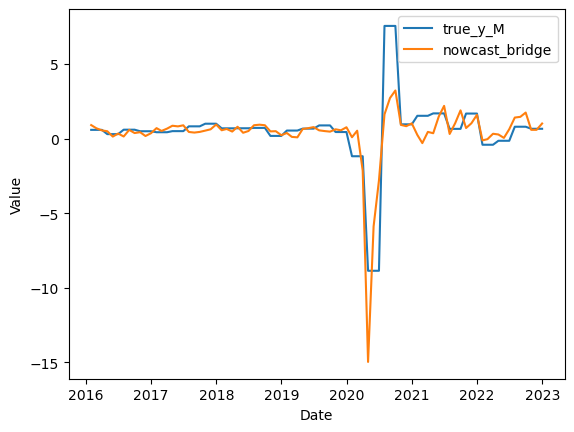

mean absolute error: 0.724235559290995
mean absolute percentage error: 0.6276219294717975
root mean square error: 1.4804586474491104
real time root-mean-squared-forecast-error: [0.32096920681882846, 0.23931552298656517, 0.1964815853481737, 0.19591854671060613, 0.19008269795332222, 0.17424959541445123, 0.2361691180385696, 0.22096961085156797, 0.22136532615898818, 0.21099518425389072, 0.2231565581586204, 0.21707006122534075, 0.22208563839773032, 0.21524241961538942, 0.21715245339336461, 0.22887817731009746, 0.23515691806675484, 0.24641007181128882, 0.25497473141843846, 0.26550008247887136, 0.2716203148916791, 0.28311867950804326, 0.2877339845402492, 0.28189744295209135, 0.27740243765593303, 0.2721362980540477, 0.270252269872769, 0.26606693348033733, 0.2673726944617901, 0.26502105760039063, 0.26267315071916814, 0.26131681108508004, 0.25918093304961953, 0.26059965332576307, 0.2623824464091027, 0.25883753202356385, 0.25672659230330613, 0.26252507293569766, 0.2691891062486585, 0.265827928253

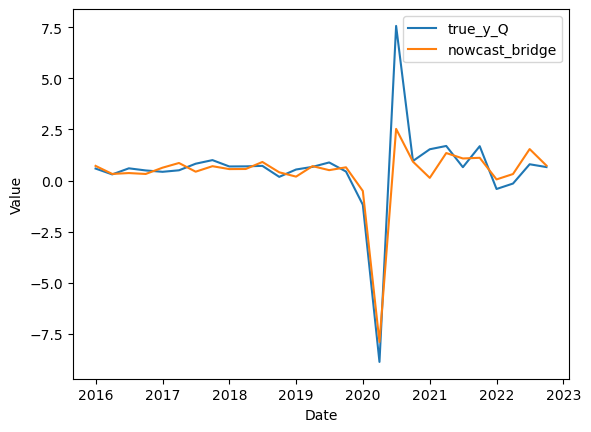

mean absolute error: 0.522856723313074
mean absolute percentage error: 0.5468122319308154
root mean square error: 1.0563972261071366
real time root-mean-squared-forecast-error: [0.13088623624500484, 0.09394941669108227, 0.15412570624455865, 0.15893590550717118, 0.16824919902860933, 0.21181902531137287, 0.2452220211522833, 0.25235695969368793, 0.2417553562645679, 0.2329106274219486, 0.22937271432330678, 0.2288500731568473, 0.24009499459219646, 0.23156498088769917, 0.2438935171370134, 0.24171532802805562, 0.2858944001951393, 0.3602702569666164, 1.2068750493439682, 1.1763386285950708, 1.1878521910875304, 1.1628907896141996, 1.1408008845382929, 1.1227826021953227, 1.104081023459321, 1.086471055785268, 1.0756954928850826]
mean directional accuracy: 0.7777777777777778
whole mean directional accuracy: 0.72
No retune Bridge overall before:


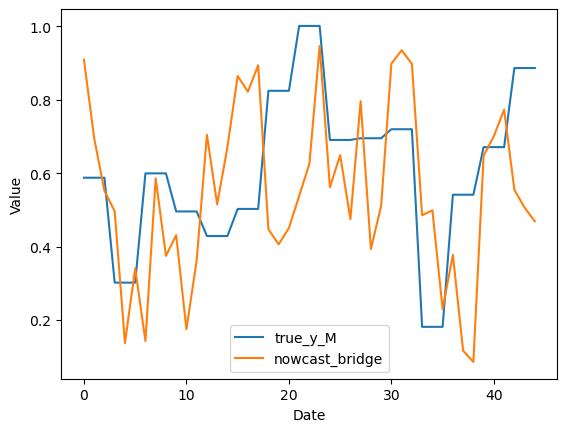

mean absolute error: 0.23002003702208773
mean absolute percentage error: 0.43280167276785186
root mean square error: 0.2694131730853114
real time root-mean-squared-forecast-error: [0.32096920681882846, 0.23931552298656517, 0.1964815853481737, 0.19591854671060613, 0.19008269795332222, 0.17424959541445123, 0.2361691180385696, 0.22096961085156797, 0.22136532615898818, 0.21099518425389072, 0.2231565581586204, 0.21707006122534075, 0.22208563839773032, 0.21524241961538942, 0.21715245339336461, 0.22887817731009746, 0.23515691806675484, 0.24641007181128882, 0.25497473141843846, 0.26550008247887136, 0.2716203148916791, 0.28311867950804326, 0.2877339845402492, 0.28189744295209135, 0.27740243765593303, 0.2721362980540477, 0.270252269872769, 0.26606693348033733, 0.2673726944617901, 0.26502105760039063, 0.26267315071916814, 0.26131681108508004, 0.25918093304961953, 0.26059965332576307, 0.2623824464091027, 0.25883753202356385, 0.25672659230330613, 0.26252507293569766, 0.2691891062486585, 0.265827928

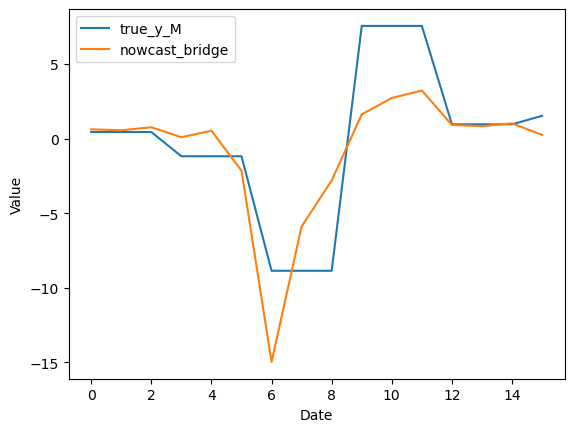

mean absolute error: 2.270942819462573
mean absolute percentage error: 0.5954266643356735
root mean square error: 3.2367576227250603
real time root-mean-squared-forecast-error: [0.1828013373837677, 0.15315942892038947, 0.223055495570566, 0.6661412354777322, 0.9707839134046671, 0.9699769876170484, 2.4797636962677934, 2.5471247697723998, 3.1376986182170485, 3.518613931723773, 3.6580219724755794, 3.71887677139805, 3.5729970696120734, 3.4431863911450225, 3.3264769394269256]
mean directional accuracy: 0.26666666666666666
whole mean directional accuracy: 0.9230769230769231
No retune Bridge overall after:


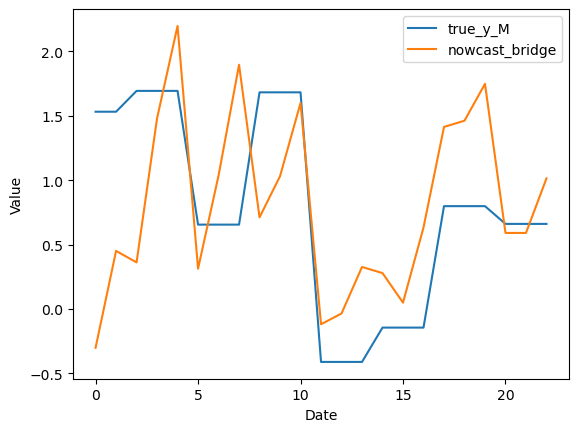

mean absolute error: 0.6152087044803682
mean absolute percentage error: 1.0311887031176905
root mean square error: 0.75802379327804
real time root-mean-squared-forecast-error: [1.8325769716965827, 1.50424523342843, 1.4488446932327437, 1.2592383041263187, 1.148658385874884, 1.0578408359871843, 0.9898922731357238, 1.0246155694935641, 1.018715892780181, 0.9881238360485209, 0.9424680726880812, 0.9062860909833719, 0.8769510996196122, 0.8677102885753927, 0.8453770578741465, 0.8199678288357156, 0.8175186266013484, 0.8075923718034663, 0.8006508108224942, 0.808739053745041, 0.7893967825138238, 0.7713922457997706]
mean directional accuracy: 0.18181818181818182
whole mean directional accuracy: 0.9


In [20]:
# Simple Bridge Equqtions: saving data & plot#
# WITH RETUNE

# saving data
nowcast_bridge = pd.DataFrame({"Monthly nowcasting":nowcast_M}, index=combined_m.loc["2016-01-01":].index)
nowcast_bridge.to_csv("/Users/xuyiqi/Desktop/results/nowcast_bridge_S1.csv")
MSE_bridge = pd.DataFrame({"MSE_bridge":MSE}, index=combined_m.loc["2016-01-01":].index)
MSE_bridge.to_csv("/Users/xuyiqi/Desktop/results/MSE_bridge_S1.csv")

nowcast_M_before = nowcast_M[:45]
nowcast_M_during = nowcast_M[45:61]
nowcast_M_after = nowcast_M[61:]

print(np.mean(MSE))

#
print("No retune Bridge overall:")

plt.plot(true_y_M['RGDP growth'], label='true_y_M')
plt.plot(nowcast_bridge['Monthly nowcasting'], label='nowcast_bridge')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

ofsperformance(true_y_M['RGDP growth'].tolist(), nowcast_M)

#
print("No retune Bridge aggregated overall:")

nowcast_bridge_agg = nowcast_bridge.resample("Q").mean()
nowcast_bridge_agg = nowcast_bridge_agg.shift(-1,freq="Q").shift(+1,freq="D")

plt.plot(true_y_Q['RGDP growth'], label='true_y_Q')
plt.plot(nowcast_bridge_agg['Monthly nowcasting'], label='nowcast_bridge')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

ofsperformance(true_y_Q['RGDP growth'].tolist(), nowcast_bridge_agg['Monthly nowcasting'].tolist())

#
print("No retune Bridge overall before:")

plt.plot(true_y_M['RGDP growth'].tolist()[:45], label='true_y_M')
plt.plot(nowcast_M[:45], label='nowcast_bridge')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

ofsperformance(true_y_M['RGDP growth'].tolist()[:45], nowcast_M[:45])
#
print("No retune Bridge overall during:")

plt.plot(true_y_M['RGDP growth'].tolist()[45:61], label='true_y_M')
plt.plot(nowcast_M[45:61], label='nowcast_bridge')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

ofsperformance(true_y_M['RGDP growth'].tolist()[45:61], nowcast_M[45:61])
#
print("No retune Bridge overall after:")

plt.plot(true_y_M['RGDP growth'].tolist()[61:], label='true_y_M')
plt.plot(nowcast_M[61:], label='nowcast_bridge')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

ofsperformance(true_y_M['RGDP growth'].tolist()[61:], nowcast_M[61:])


In [21]:
bridge_res1 = np.array(true_y_M['RGDP growth'].tolist()) - np.array(nowcast_M)
bridge_res1
np.save('bridge_res1.npy', bridge_res1)

NoRetune M1


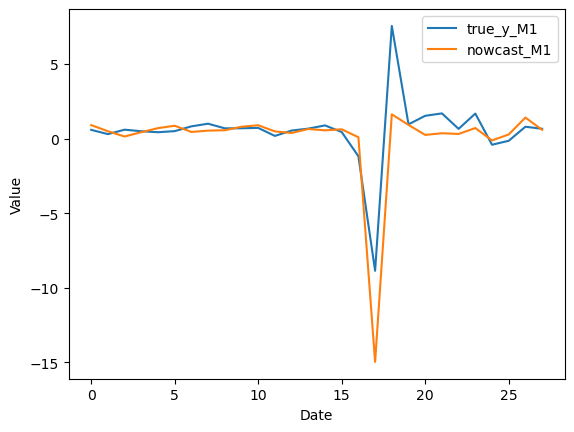

overall
mean absolute error: 0.8076295711943164
mean absolute percentage error: 0.6274079573059532
root mean square error: 1.6964868924005265
real time root-mean-squared-forecast-error: [0.32096920681882846, 0.26527579927680617, 0.34107474085949147, 0.29713723500731265, 0.29288755798754657, 0.30543720267807906, 0.3166924703498987, 0.3384090438795216, 0.3219351587650495, 0.3070774448864616, 0.2976870610987731, 0.29819465071738865, 0.2900622542478556, 0.27957885713487113, 0.2833197983161795, 0.27810384197252913, 0.41039315947319194, 1.4955981162708916, 1.992917901673856, 1.9424750317087291, 1.9161972644307572, 1.8935296102924248, 1.8532823928943518, 1.8250390583664946, 1.7891223384177737, 1.7563402516283901, 1.7275649956832522]
mean directional accuracy: 0.6666666666666666
whole mean directional accuracy: 0.72
before
mean absolute error: 0.24951695142861516
mean absolute percentage error: 0.4883872092911263
root mean square error: 0.2833197983161795
real time root-mean-squared-forecast-e

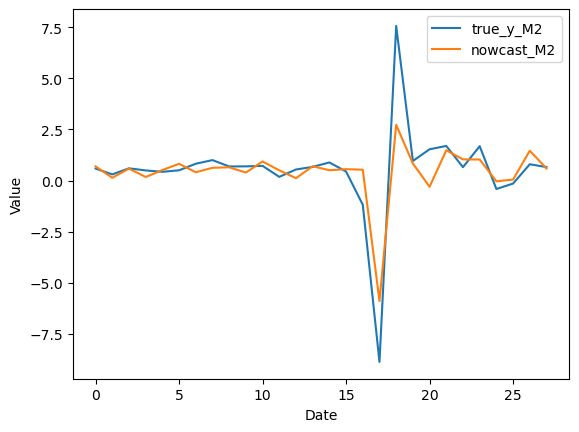

overall
mean absolute error: 0.630768645416775
mean absolute percentage error: 0.543350155573178
root mean square error: 1.2091607541095442
real time root-mean-squared-forecast-error: [0.10734340854825941, 0.13900262566592833, 0.1137732321145601, 0.18803637360579123, 0.1725424584552066, 0.20443832526268998, 0.24650293807777812, 0.2660120385041135, 0.25117694278451175, 0.25667101848134183, 0.2531716331397854, 0.25910096549751865, 0.27539082083149635, 0.2654942021165704, 0.27463121818595687, 0.26749227587209, 0.4900158660475062, 0.847877256238639, 1.3827139104843373, 1.3479893911319334, 1.3749432253088614, 1.3440968228156218, 1.3169490680698548, 1.2960518576192195, 1.2720899069391451, 1.2479666319953735, 1.2312750598848776]
mean directional accuracy: 0.6666666666666666
whole mean directional accuracy: 0.76
before
mean absolute error: 0.23429537001895226
mean absolute percentage error: 0.4608456515009226
root mean square error: 0.27463121818595687
real time root-mean-squared-forecast-erro

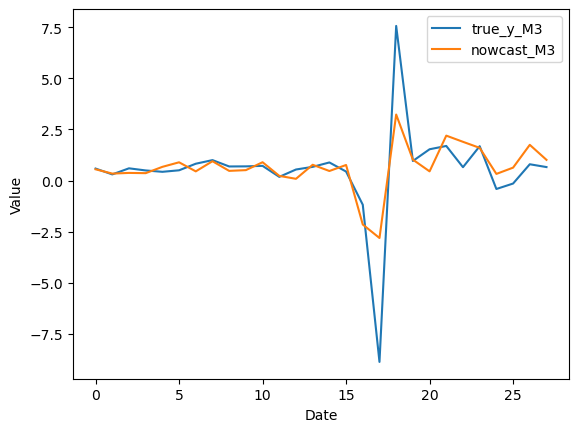

overall
mean absolute error: 0.7343084612618938
mean absolute percentage error: 0.7121076755362614
root mean square error: 1.4950370948759064
real time root-mean-squared-forecast-error: [0.03565390663207302, 0.03736020452740178, 0.1331596623541185, 0.13307899990047994, 0.1609706260489692, 0.21694897292706916, 0.24550960699790625, 0.23046782729964044, 0.22885970610507295, 0.22479304710920556, 0.22093167721520457, 0.211984065235896, 0.23960824115890023, 0.23249774519982241, 0.24911434999908091, 0.25411796370118905, 0.34008996543507186, 1.4657166803037092, 1.7386930662280713, 1.6947314696169535, 1.670606735655848, 1.6357347553994899, 1.620564980862787, 1.5865335550383148, 1.5614539805486678, 1.5387011439642064, 1.5209526244339806]
mean directional accuracy: 0.7407407407407407
whole mean directional accuracy: 0.76
before
mean absolute error: 0.2062477896186958
mean absolute percentage error: 0.34917215751150654
root mean square error: 0.24911434999908091
real time root-mean-squared-forecas

In [22]:
#retune
nowcast_M1 = nowcast_M[0::3]
nowcast_M2 = nowcast_M[1::3]
nowcast_M3 = nowcast_M[2::3]
true_y_M1 = true_y_M['RGDP growth'].tolist()[0::3]
true_y_M2 = true_y_M['RGDP growth'].tolist()[1::3]
true_y_M3 = true_y_M['RGDP growth'].tolist()[2::3]

#
print("NoRetune M1")

plt.plot(true_y_M1, label='true_y_M1')
plt.plot(nowcast_M1, label='nowcast_M1')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

print("overall")
ofsperformance(true_y_M1, nowcast_M1)
print("before")
ofsperformance(true_y_M1[:15], nowcast_M1[:15])
print("during")
ofsperformance(true_y_M1[15:19], nowcast_M1[15:19])
print("during")
ofsperformance(true_y_M1[19:], nowcast_M1[19:])
#
print("NoRetune M2")

plt.plot(true_y_M2, label='true_y_M2')
plt.plot(nowcast_M2, label='nowcast_M2')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

print("overall")
ofsperformance(true_y_M2, nowcast_M2)
print("before")
ofsperformance(true_y_M2[:15], nowcast_M2[:15])
print("during")
ofsperformance(true_y_M2[15:19], nowcast_M2[15:19])
print("after")
ofsperformance(true_y_M2[19:], nowcast_M2[19:])

#
print("NoRetune M3")

plt.plot(true_y_M3, label='true_y_M3')
plt.plot(nowcast_M3, label='nowcast_M3')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

print("overall")
ofsperformance(true_y_M3, nowcast_M3)
print("before")
ofsperformance(true_y_M3[:15], nowcast_M3[:15])
print("during")
ofsperformance(true_y_M3[15:19], nowcast_M3[15:19])
print("during")
ofsperformance(true_y_M3[19:], nowcast_M3[19:])

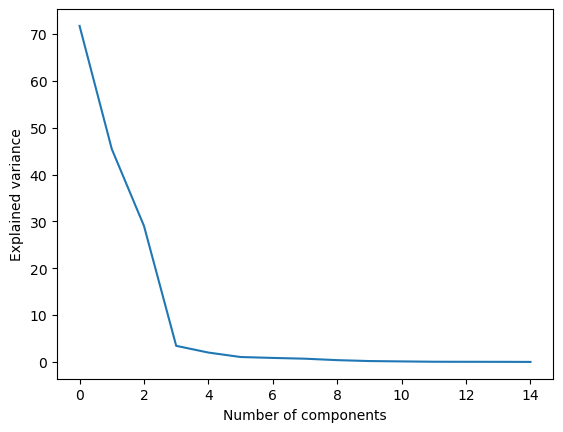

Number of common factors: 3
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     3.345
Date:                Thu, 06 Apr 2023   Prob (F-statistic):             0.0250
Time:                        08:19:19   Log-Likelihood:                -48.693
No. Observations:                  63   AIC:                             105.4
Df Residuals:                      59   BIC:                             114.0
Df Model:                           3                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0688   

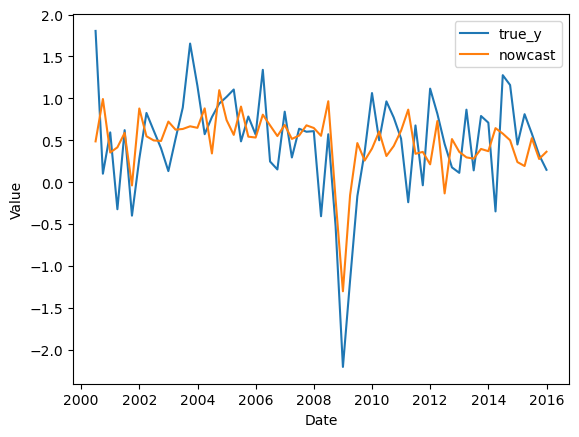

in sample MSE: 0.2746984346814826


In [23]:
# Dynamic factor model

# Slip dataset: initial training set and initial test set

y_train = y_total.loc[:"2015-12-31"]

X_train_M = combined_m.loc[:"2016-01-01"] 
X_train_D = D_data.loc[:"2015-12-31"]
X_train_W = W_data.loc[:"2016-01-01"]

X_train_DM = X_train_D.resample("M").mean()
X_train_DM = X_train_DM.drop(index=["2000-01-31"])  
X_train_WM = X_train_W.resample("M").mean()
X_train_WM = X_train_WM.drop(index=["2000-01-31"])  

index_ind = pd.period_range(start="2000-02-29", periods=191, freq="M")
indicators = pd.concat([X_train_M, X_train_WM, X_train_DM], axis=1)
indicators.index = index_ind

trained_factor_estimates = []

#Step 1
# (training set) Principal component analysis: identify the number of principal components

pca = PCA()
pca.fit(indicators)
eigenvalues = pca.explained_variance_
plt.plot(eigenvalues)
plt.xlabel("Number of components")
plt.ylabel("Explained variance")
plt.show()
num_factors = np.sum(np.cumsum(pca.explained_variance_ratio_) < 0.8) + 1
print("Number of common factors:", num_factors)

n_factors = 3

# train DFM and OLS bridge

mod = DynamicFactor(indicators, k_factors=n_factors, factor_order=1, error_order=0)
initial_res = mod.fit(method='powell', disp=False)
factor_est = mod.smooth(initial_res.params)

trained_factor_estimates.append(factor_est.factors.filtered)

train = initial_res.factors.smoothed
Q_train = pd.DataFrame({"0": train[0], "1": train[1],"2": train[2]},index=indicators.index).resample("Q").mean()
Q_train = Q_train.drop(index=["2000-03-31"]) 
Q_train = sm.add_constant(Q_train)

DFMmodel = sm.OLS(y_train["RGDP growth"].tolist(), Q_train)
results_DFM = DFMmodel.fit(cov_type='HAC', cov_kwds={'maxlags': 4})
print(results_DFM.summary())

# in sample performance

train_factors = factor_est.factors.smoothed
Q_factors = pd.DataFrame({"0": train_factors[0], "1": train_factors[1],
              "2": train_factors[2]}, index=indicators.index).resample("Q").mean()

Q_factors = Q_factors.drop(index=["2000-03-31"])
Q_factors = sm.add_constant(Q_factors)

insample_predicted_DFM = results_DFM.predict(Q_factors)
insample_DFM = pd.DataFrame(insample_predicted_DFM.values, index=y_train.index)

plt.plot(y_train['RGDP growth'], label='true_y')
plt.plot(insample_DFM, label='nowcast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

is_MSEdfm = mean_squared_error(y_train.values[:,0], insample_predicted_DFM.values)
print("in sample MSE:", is_MSEdfm)

In [24]:
r2_DFM = r2_score(y_train["RGDP growth"], insample_predicted_DFM)
r2_DFM
mse_DFM = mean_squared_error(y_train["RGDP growth"], insample_predicted_DFM)
mse_DFM

0.2746984346814826

In [25]:
DFM_res1 = np.array(true_y_M['RGDP growth'].tolist()) - np.array(nowcast_DFM_M)
DFM_res1
np.save('DFM_res1.npy', DFM_res1)

NameError: name 'nowcast_DFM_M' is not defined

In [ ]:
# Dynamic factor model: out of sample performance

nowcast_DFM_M = []
MSE_DFM = []
test_size = len(combined_m.loc["2016-01-01":])
train_end = combined_m.index.get_loc("2015-12-31")
test_factor_estmates = pd.DataFrame(columns=["0", "1", "2"])

for i in tqdm(range(1, test_size+1),desc='progress bar'): 
    
    # generate timestep for sets
    # current_month is the end date of the month, so DWM data known
    
    current_month_index = train_end + i
    current_month = combined_m.index[current_month_index]
    start_of_month = current_month - pd.offsets.MonthBegin(1) 
    
    # generate set for new observations of current month
    
    observed_test_D = D_data.loc[(D_data.index > start_of_month) & (D_data.index <=current_month)] 
    observed_test_D = observed_test_D.resample("M").mean()
    
    observed_test_W = W_data.loc[(W_data.index > start_of_month) & (W_data.index <=current_month)] 
    observed_test_W = observed_test_W.resample("M").mean()
    
    observed_test_M = combined_m.loc[(combined_m.index > start_of_month) & (combined_m.index <=current_month)] 
    
    observed_test = pd.concat([observed_test_M, observed_test_W, observed_test_D], axis=1)
    index_test = pd.period_range(start=current_month, periods=1, freq="M")
    observed_test.index = index_test
    
    # factor estimates for current month
    
    factor_estimates = factor_est.apply(observed_test)
    new_fac = {"0": factor_estimates.factors.smoothed[0,0], 
                "1": factor_estimates.factors.smoothed[1,0], 
                "2": factor_estimates.factors.smoothed[2,0]}
    
    test_factor_estmates = test_factor_estmates.append(new_fac, ignore_index=True)   
    
    # forecasted factor estimates for the following months in the current quarter (first/second month)

    if (i%3 == 1) or (i%3 == 2):
        
        Num = i%3
        target_month_index = current_month_index + (3 - Num) 
        target_month = combined_m.index[target_month_index]
        start_of_quarter = current_month - pd.offsets.MonthBegin(Num)
        index_quarter = pd.period_range(start=start_of_quarter, periods=3, freq="M")
        
        forecast_obs = factor_estimates.forecast(3-Num)
        forecast_factors = factor_estimates.apply(forecast_obs)
        
        # Combined factor estimates for current quarter
         
        F_est = test_factor_estmates.loc[i-Num:i-1] #Filtered and Smoothed are different
        
        forecast_F = pd.DataFrame({"0": forecast_factors.factors.smoothed[0,:].tolist(), 
                "1": forecast_factors.factors.smoothed[1,:].tolist(), 
                "2": forecast_factors.factors.smoothed[2,:].tolist()})
        
        F_currentQ = pd.concat([F_est, forecast_F], ignore_index=True)
        F_currentQ.index = index_quarter
        F_currentQ = F_currentQ.resample("Q").mean()
        
    # use current quarter's factor estimates directly if it is the last month
    else:
        target_month = current_month
        start_of_quarter = current_month - pd.offsets.MonthBegin(3)
        index_quarter = pd.period_range(start=start_of_quarter, periods=3, freq="M")
        
        F_currentQ = test_factor_estmates.loc[i-3:i-1]
        F_currentQ.index = index_quarter
        F_currentQ = F_currentQ.resample("Q").mean()
        
    # use the OLS to make prediction for GDP growth rate
    
    F_currentQ.insert(0, "Constant", 1)
    prediction = results_DFM.predict(F_currentQ)
    predicted = prediction.values.item()
    nowcast_DFM_M.append(predicted)
        
    # record MSE
        
    true_rgdp_growth = y_total.loc[target_month]
    mse = mean_squared_error([true_rgdp_growth], [prediction])
    MSE_DFM.append(mse)
    
    if i%12 == 0:# retune the model every two years
        # update training set 
        X_train_M = combined_m.loc[:current_month]
        X_train_W = W_data.loc[:current_month]
        X_train_D = D_data.loc[:current_month]
        
        X_train_DM = X_train_D.resample("M").mean()
        X_train_DM = X_train_DM.drop(index=["2000-01-31"])  
        X_train_WM = X_train_W.resample("M").mean()
        X_train_WM = X_train_WM.drop(index=["2000-01-31"])  
        
        current_trainset = pd.concat([X_train_M, X_train_WM, X_train_DM], axis=1)
        
        index_current = pd.period_range(start="2000-02-29", periods=191+i, freq="M")
        indicators_current = pd.concat([X_train_M, X_train_WM, X_train_DM], axis=1)
        indicators_current.index = index_current
        
        pca = PCA()
        pca.fit(indicators_current)
        num_factors = np.sum(np.cumsum(pca.explained_variance_ratio_) < 0.8) + 1
        print("Number of common factors:", num_factors)
        
        mod = DynamicFactor(indicators_current, k_factors=3, factor_order=1, error_order=0)
        initial_res = mod.fit(method='powell', disp=False)
        factor_est = mod.smooth(initial_res.params)
        
        y_train = y_total.loc[:current_month]
        
        train = initial_res.factors.filtered
        Q_train = pd.DataFrame({"0": train[0], "1": train[1],"2": train[2]},
                           index=indicators_current.index).resample("Q").mean()
        Q_train = Q_train.drop(index=["2000-03-31"]) 
        Q_train = sm.add_constant(Q_train)
        
        DFMmodel = sm.OLS(y_train["RGDP growth"].tolist(), Q_train)
        results_DFM = DFMmodel.fit()
        print(results_DFM.summary())
        
        # in sample performance
        train_factors = factor_est.factors.smoothed
        Q_factors = pd.DataFrame({"0": train_factors[0], "1": train_factors[1],
              "2": train_factors[2]}, index=indicators_current.index).resample("Q").mean()
        
        Q_factors = Q_factors.drop(index=["2000-03-31"])
        Q_factors = sm.add_constant(Q_factors)
        
        insample_predicted_DFM = results_DFM.predict(Q_factors)
        insample_DFM = pd.DataFrame(insample_predicted_DFM.values, index=y_train.index)


In [ ]:
# DFM: saving data & plot#
# WITHOUT RETUNE

# saving data
nowcast_DFM = pd.DataFrame({"Monthly nowcasting":nowcast_DFM_M}, index=combined_m.loc["2016-01-01":].index)
nowcast_DFM.to_csv("/Users/xuyiqi/Desktop/results/nowcast_DFM_S1.csv")
MSE_DFM = pd.DataFrame({"MSE_DFM":MSE_DFM}, index=combined_m.loc["2016-01-01":].index)
MSE_DFM.to_csv("/Users/xuyiqi/Desktop/results/MSE_DFM_S1.csv")

nowcast_DFM_M_before = nowcast_DFM_M[:45]
nowcast_DFM_M_during = nowcast_DFM_M[45:61]
nowcast_DFM_M_after = nowcast_DFM_M[61:]

print(np.mean(MSE_DFM))

#
print("No retune DFM overall:")

plt.plot(true_y_M['RGDP growth'], label='true_y_M')
plt.plot(nowcast_DFM['Monthly nowcasting'], label='nowcast_DFM')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

ofsperformance(true_y_M['RGDP growth'].tolist(), nowcast_DFM_M)

#
print("No retune DFM aggregated overall:")

nowcast_DFM_agg = nowcast_DFM.resample("Q").mean()
nowcast_DFM_agg = nowcast_DFM_agg.shift(-1,freq="Q").shift(+1,freq="D")

plt.plot(true_y_Q['RGDP growth'], label='true_y_Q')
plt.plot(nowcast_DFM_agg['Monthly nowcasting'], label='nowcast_DFM')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

ofsperformance(true_y_Q['RGDP growth'].tolist(), nowcast_DFM_agg['Monthly nowcasting'].tolist())

#
print("No retune DFM overall before:")

plt.plot(true_y_M['RGDP growth'].tolist()[:45], label='true_y_M')
plt.plot(nowcast_DFM_M[:45], label='nowcast_DFM')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

ofsperformance(true_y_M['RGDP growth'].tolist()[:45], nowcast_DFM_M[:45])
#
print("No retune DFM overall during:")

plt.plot(true_y_M['RGDP growth'].tolist()[45:61], label='true_y_M')
plt.plot(nowcast_DFM_M[45:61], label='nowcast_DFM')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

ofsperformance(true_y_M['RGDP growth'].tolist()[45:61], nowcast_DFM_M[45:61])
#
print("No retune DFM overall after:")

plt.plot(true_y_M['RGDP growth'].tolist()[61:], label='true_y_M')
plt.plot(nowcast_DFM_M[61:], label='nowcast_DFM')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

ofsperformance(true_y_M['RGDP growth'].tolist()[61:], nowcast_DFM_M[61:])


In [ ]:
# Non retune
nowcast_DFM_M1 = nowcast_DFM_M[0::3]
nowcast_DFM_M2 = nowcast_DFM_M[1::3]
nowcast_DFM_M3 = nowcast_DFM_M[2::3]
true_y_M1 = true_y_M['RGDP growth'].tolist()[0::3]
true_y_M2 = true_y_M['RGDP growth'].tolist()[1::3]
true_y_M3 = true_y_M['RGDP growth'].tolist()[2::3]

#
print("NoRetune M1")

plt.plot(true_y_M1, label='true_y_M1')
plt.plot(nowcast_DFM_M1, label='nowcast_DFM_M1')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

print("overall")
ofsperformance(true_y_M1, nowcast_DFM_M1)
print("before")
ofsperformance(true_y_M1[:15], nowcast_DFM_M1[:15])
print("during")
ofsperformance(true_y_M1[15:19], nowcast_DFM_M1[15:19])
print("after")
ofsperformance(true_y_M1[19:], nowcast_DFM_M1[19:])
#
print("NoRetune M2")

plt.plot(true_y_M2, label='true_y_M2')
plt.plot(nowcast_DFM_M2, label='nowcast_DFM_M2')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

print("overall")
ofsperformance(true_y_M2, nowcast_DFM_M2)
print("before")
ofsperformance(true_y_M2[:15], nowcast_DFM_M2[:15])
print("during")
ofsperformance(true_y_M2[15:19], nowcast_DFM_M2[15:19])
print("after")
ofsperformance(true_y_M2[19:], nowcast_DFM_M2[19:])

#
print("NoRetune M3")

plt.plot(true_y_M3, label='true_y_M3')
plt.plot(nowcast_DFM_M3, label='nowcast_DFM_M3')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

print("overall")
ofsperformance(true_y_M3, nowcast_DFM_M3)
print("before")
ofsperformance(true_y_M3[:15], nowcast_DFM_M3[:15])
print("during")
ofsperformance(true_y_M3[15:19], nowcast_DFM_M3[15:19])
print("after")
ofsperformance(true_y_M3[19:], nowcast_DFM_M3[19:])

In [ ]:
# Random Forest

y_train = y_total.loc[:"2015-12-31"]

X_train_M = combined_m.loc[:"2016-01-01"] 
X_train_D = D_data.loc[:"2015-12-31"]
X_train_W = W_data.loc[:"2015-12-31"]

y_test= y_total.loc["2015-12-31":]

X_test_M = combined_m.loc["2016-01-01":] 
X_test_D = D_data.loc["2016-01-01":]
X_test_W = W_data.loc["2016-01-01":]

In [139]:
def supToMonth(D):
    currentMonth = None
    counter = 0
    data = []
    figure = 0
    for idx in D.index:
        date = idx.date().strftime('%Y-%m-%d')
        month = date[:-3]
        #print(month)
        #print(month)
        if currentMonth == None:
            currentMonth = month
                
        if month != currentMonth:
            #new month
            #print('cur'+currentMonth)
            data.append(figure/counter)
            
            figure = D.loc[date].to_numpy()
            counter = 1
            currentMonth = month
        else:
            figure += D.loc[date].to_numpy()
            counter += 1
    
    data.append(figure/counter) #finishing up
    
    return np.array(data)

def raiseToMonth(D):
    data = []
    for idx in D.index:
        tmp = [D.loc[idx].to_numpy()] * 3
        data += tmp
    return np.array(data)

In [140]:
y = raiseToMonth(y_train)

In [155]:
train_X = np.concatenate((X_train_M.to_numpy()[2:,:], supToMonth(X_train_D)[3:,:], supToMonth(X_train_W)[3:,:]), axis=1)
train_y = raiseToMonth(y_train)
test_X = np.concatenate((X_test_M.to_numpy(), supToMonth(X_test_D), supToMonth(X_test_W)), axis=1)
test_y = raiseToMonth(y_test[1:])

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(189, 15) (189, 1) (84, 15) (84, 1)


/var/folders/nm/mxqq3mvn68xd1lxfxsgnsh240000gn/T/ipykernel_25771/2210651392.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



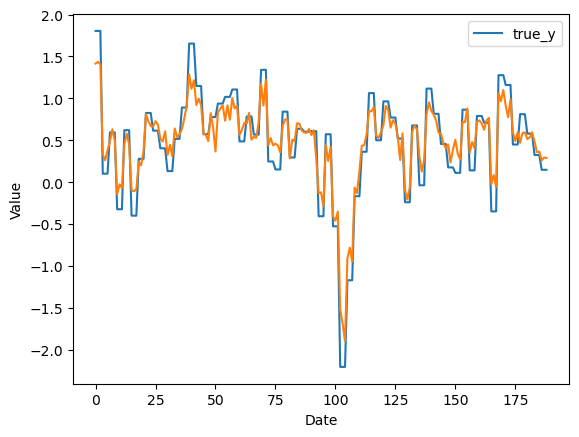

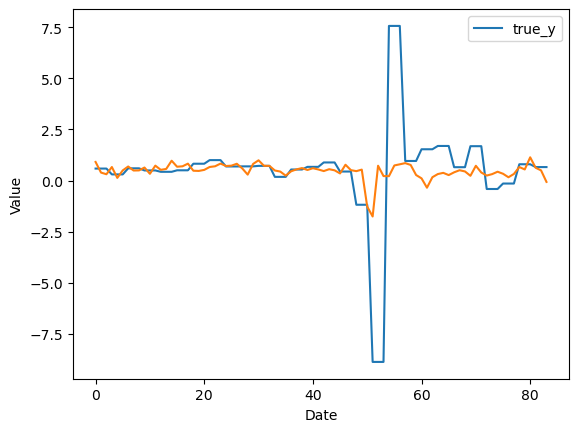

In [170]:
regr = RandomForestRegressor(max_depth=10, random_state=0)

regr.fit(train_X, train_y)
insample_RF = regr.predict(train_X)
nowcast_RF_M = regr.predict(test_X)

# in sample
plt.plot(train_y, label='true_y')
plt.plot(regr.predict(train_X))
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

#out of sample (Without retune)
plt.plot(test_y, label='true_y')
plt.plot(regr.predict(test_X))
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
meta_train_X = np.concatenate((train_X, test_X), axis = 0)
meta_train_y = np.concatenate((train_y, test_y), axis = 0)
print(meta_train_X.shape, meta_train_y.shape)

regr = RandomForestRegressor(max_depth=10, random_state=0)
regr.fit(meta_train_X[2:189,:], meta_train_y[2:189,:].squeeze(1))

In [ ]:
x_counter = 189
nowcast_RF_M = []
for i in range(7):
    start = x_counter
    end = x_counter + 12
    
    pred = regr.predict(meta_train_X[start:end, :])
    predicted.append(pred)
    
    regr.fit(meta_train_X[2:end, :], meta_train_y[2:end, :].squeeze(1))
    
    x_counter = end
    
plt.plot(meta_train_y[189:,:], label='true_y')
plt.plot(np.hstack(predicted), label='predicted_y')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [178]:
r2_RF = r2_score(train_y, insample_RF)
r2_DFM

mse_RF = mean_squared_error(train_y, insample_RF)
mse_RF

0.04287188027592728

In [267]:
RF_res1 = np.array(true_y_M['RGDP growth'].tolist()) - np.array(nowcast_RF_M)
RF_res1
np.save('RF_res1.npy', RF_res1)

No retune RF overall:


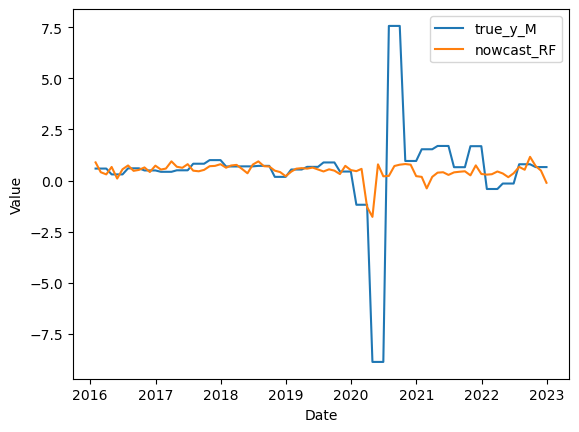

mean absolute error: 0.9399480473191643
mean absolute percentage error: 0.6387994089769944
root mean square error: 2.1884034096751623
real time root-mean-squared-forecast-error: [0.3018980445685173, 0.2480215227404814, 0.26083097868548355, 0.2901293232438565, 0.27490406229911835, 0.2711263689127604, 0.2564684950100862, 0.24381625781783767, 0.23127858679693497, 0.2242986832296368, 0.21511111806552868, 0.21671001799513934, 0.2104396225916384, 0.2071531752648581, 0.23975278172832096, 0.23618429046192954, 0.23103742058285265, 0.23540753520263574, 0.242023846666348, 0.24999140233073794, 0.25262240059543684, 0.2548456767041638, 0.25610751036441204, 0.2539991092791045, 0.2491742528522894, 0.24450780546456874, 0.24039240915483548, 0.23719388709102252, 0.24139368065044925, 0.23788435076955206, 0.2373164287897904, 0.23359584378775464, 0.23009465346009192, 0.23261891244526686, 0.23264031806174443, 0.22944084074246815, 0.22698061290685764, 0.22406654118457056, 0.22143930624291885, 0.21907866225593

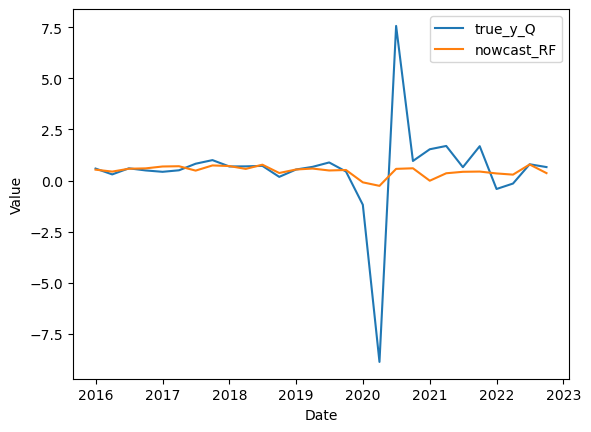

mean absolute error: 0.9000456451876516
mean absolute percentage error: 0.5682805087355386
root mean square error: 2.166337526365469
real time root-mean-squared-forecast-error: [0.053799106096862004, 0.10443761758434413, 0.08605749093602434, 0.09012256275005656, 0.14146638310626747, 0.15251753148818203, 0.1901061992517056, 0.20016114979293276, 0.18883870088233137, 0.18340300044781244, 0.17572214223954344, 0.1768885532105506, 0.1699491105776514, 0.16527152183030644, 0.18905142947567602, 0.18400312609899866, 0.3201891344464649, 2.0527245272988504, 2.561710326697734, 2.498125148770329, 2.460907116673368, 2.421117504117781, 2.368364814973601, 2.3322877950435985, 2.290219851931283, 2.2473687785560736, 2.2053592483114492]
mean directional accuracy: 0.6296296296296297
whole mean directional accuracy: 0.76
No retune RF overall before:


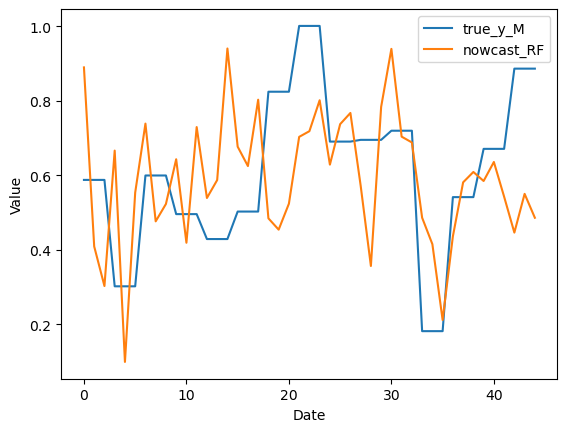

mean absolute error: 0.19453284288825862
mean absolute percentage error: 0.3813543528805418
root mean square error: 0.23113817580825302
real time root-mean-squared-forecast-error: [0.3018980445685173, 0.2480215227404814, 0.26083097868548355, 0.2901293232438565, 0.27490406229911835, 0.2711263689127604, 0.2564684950100862, 0.24381625781783767, 0.23127858679693497, 0.2242986832296368, 0.21511111806552868, 0.21671001799513934, 0.2104396225916384, 0.2071531752648581, 0.23975278172832096, 0.23618429046192954, 0.23103742058285265, 0.23540753520263574, 0.242023846666348, 0.24999140233073794, 0.25262240059543684, 0.2548456767041638, 0.25610751036441204, 0.2539991092791045, 0.2491742528522894, 0.24450780546456874, 0.24039240915483548, 0.23719388709102252, 0.24139368065044925, 0.23788435076955206, 0.2373164287897904, 0.23359584378775464, 0.23009465346009192, 0.23261891244526686, 0.23264031806174443, 0.22944084074246815, 0.22698061290685764, 0.22406654118457056, 0.22143930624291885, 0.219078662255

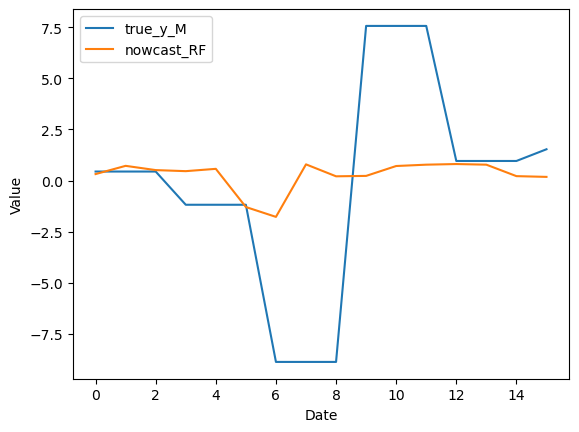

mean absolute error: 3.3247100343516918
mean absolute percentage error: 0.7327757102770376
root mean square error: 4.87947629846261
real time root-mean-squared-forecast-error: [0.12404200440539698, 0.21544079380738174, 0.1805428742689299, 0.8361333802852104, 1.0844207318686117, 0.9909694244545629, 2.832975298121606, 4.322541100572442, 5.075260206515958, 5.344065689021762, 5.4979460629387615, 5.616345249639037, 5.396170143948329, 5.200104476313576, 5.027424353364134]
mean directional accuracy: 0.2
whole mean directional accuracy: 0.46153846153846156
No retune DFM overall after:


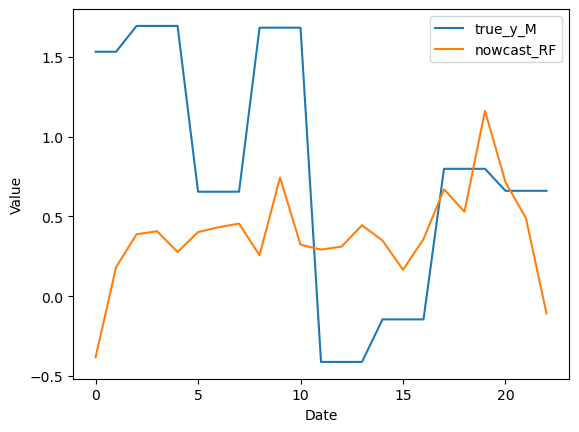

mean absolute error: 0.7394042389222212
mean absolute percentage error: 1.0771214395656752
root mean square error: 0.9072762611194191
real time root-mean-squared-forecast-error: [1.913577627565274, 1.6556597268606414, 1.5475384851920182, 1.4862704773300666, 1.472396299061496, 1.348068312688333, 1.250898051481436, 1.1722410413749829, 1.202943816364502, 1.179140252801631, 1.1965835083173113, 1.16348446610961, 1.1356376753863, 1.1179704405588748, 1.087548865240086, 1.0558782803479685, 1.0315697154952812, 1.0029632675455478, 0.9781545017153477, 0.9568406654269296, 0.9338553537228161, 0.9131179228831013]
mean directional accuracy: 0.18181818181818182
whole mean directional accuracy: 0.5


In [145]:
# DFM: saving data & plot#
# WITHOUT RETUNE

# saving data
nowcast_RF = pd.DataFrame({"Monthly nowcasting":nowcast_RF_M}, index=combined_m.loc["2016-01-01":].index)
nowcast_RF.to_csv("/Users/xuyiqi/Desktop/results/nowcast_RF_S1.csv")


nowcast_RF_M_before = nowcast_RF_M[:45]
nowcast_RF_M_during = nowcast_RF_M[45:61]
nowcast_RF_M_after = nowcast_RF_M[61:]


#
print("No retune RF overall:")

plt.plot(true_y_M['RGDP growth'], label='true_y_M')
plt.plot(nowcast_RF['Monthly nowcasting'], label='nowcast_RF')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

ofsperformance(true_y_M['RGDP growth'].tolist(), nowcast_RF_M)

#
print("No retune RF aggregated overall:")

nowcast_RF_agg = nowcast_RF.resample("Q").mean()
nowcast_RF_agg = nowcast_RF_agg.shift(-1,freq="Q").shift(+1,freq="D")

plt.plot(true_y_Q['RGDP growth'], label='true_y_Q')
plt.plot(nowcast_RF_agg['Monthly nowcasting'], label='nowcast_RF')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

ofsperformance(true_y_Q['RGDP growth'].tolist(), nowcast_RF_agg['Monthly nowcasting'].tolist())

#
print("No retune RF overall before:")

plt.plot(true_y_M['RGDP growth'].tolist()[:45], label='true_y_M')
plt.plot(nowcast_RF_M[:45], label='nowcast_RF')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

ofsperformance(true_y_M['RGDP growth'].tolist()[:45], nowcast_RF_M[:45])
#
print("No retune RF overall during:")

plt.plot(true_y_M['RGDP growth'].tolist()[45:61], label='true_y_M')
plt.plot(nowcast_RF_M[45:61], label='nowcast_RF')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

ofsperformance(true_y_M['RGDP growth'].tolist()[45:61], nowcast_RF_M[45:61])
#
print("No retune DFM overall after:")

plt.plot(true_y_M['RGDP growth'].tolist()[61:], label='true_y_M')
plt.plot(nowcast_RF_M[61:], label='nowcast_RF')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

ofsperformance(true_y_M['RGDP growth'].tolist()[61:], nowcast_RF_M[61:])


NoRetune M1


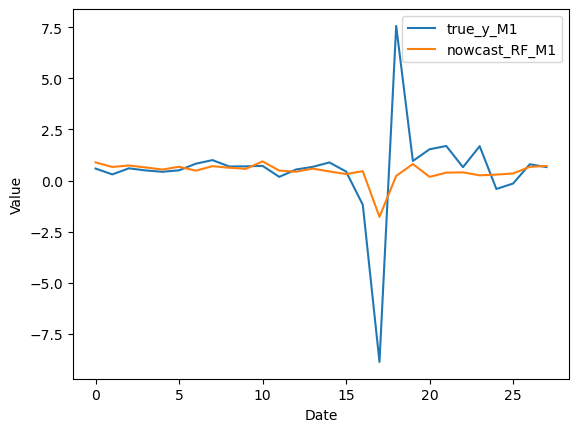

overall
mean absolute error: 0.9023922797156196
mean absolute percentage error: 0.6597979900072056
root mean square error: 2.01823340112983
real time root-mean-squared-forecast-error: [0.3018980445685173, 0.33447281489828556, 0.2846750795920537, 0.2572987725440162, 0.2353528000478566, 0.22629702540057642, 0.24573406928047647, 0.2528181221913877, 0.23924838093718231, 0.2302552131533953, 0.22930674378366595, 0.23647643672898114, 0.22906986381898678, 0.22193759664119958, 0.24264686377424485, 0.23697955164278714, 0.4600024204865916, 1.7302112705559247, 2.38030674875114, 2.3202781673632336, 2.2834550284184725, 2.248228717236552, 2.199443474833861, 2.172691866595137, 2.133434591923939, 2.0942412457574893, 2.055241975888783]
mean directional accuracy: 0.5925925925925926
whole mean directional accuracy: 0.64
before
mean absolute error: 0.2142801304597457
mean absolute percentage error: 0.441970084301074
root mean square error: 0.24264686377424485
real time root-mean-squared-forecast-error: [0.

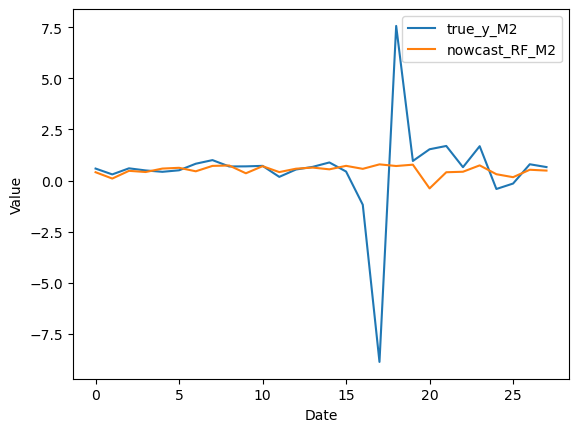

overall
mean absolute error: 0.9684013957877982
mean absolute percentage error: 0.5983128389615702
root mean square error: 2.3222495568309474
real time root-mean-squared-forecast-error: [0.17856909634849977, 0.19111258813819001, 0.17145102388237005, 0.15336891149681353, 0.15437575750914148, 0.1494779764264899, 0.19677424071283336, 0.20940869250924002, 0.19804784414535442, 0.21623056623960454, 0.20622350027017, 0.20862038525962426, 0.20073771590237563, 0.19366449567147356, 0.20623609944049778, 0.21145965677616033, 0.4727148427295411, 2.3225160893338117, 2.7530327475147662, 2.6836293510956835, 2.65203524017708, 2.6055053850683496, 2.5486567250390673, 2.5023324808882683, 2.456024618199911, 2.4091017173850284, 2.3646325442269682]
mean directional accuracy: 0.5555555555555556
whole mean directional accuracy: 0.72
before
mean absolute error: 0.17064770189707884
mean absolute percentage error: 0.3364491954153327
root mean square error: 0.20623609944049778
real time root-mean-squared-forecast-

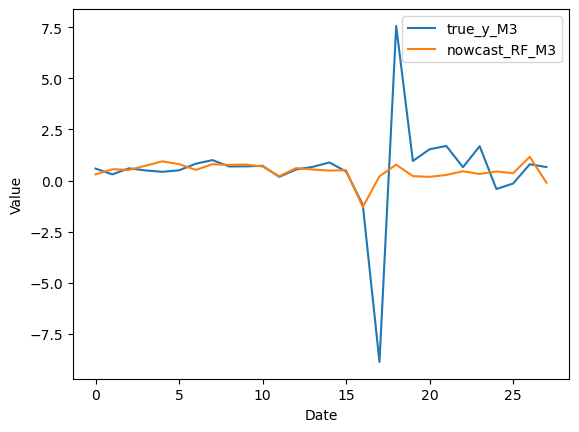

overall
mean absolute error: 0.9490504664540749
mean absolute percentage error: 0.6582873979622068
root mean square error: 2.213869775934442
real time root-mean-squared-forecast-error: [0.2847262665106036, 0.26857482850891745, 0.2236828102499318, 0.22619684863407372, 0.3053217549447077, 0.3044603648241149, 0.30388961356806843, 0.29287819846640445, 0.2773135315596983, 0.26456336114915524, 0.2524300573315522, 0.24183822677137295, 0.23310398098763474, 0.22722608663037772, 0.24261850658182038, 0.23557294691812591, 0.23011437000475018, 2.150577410078268, 2.6083689708946554, 2.5477235682674237, 2.503697708549193, 2.464680516932277, 2.4108655494067315, 2.3763460018889715, 2.3346156025632836, 2.291396958285894, 2.2496497122925687]
mean directional accuracy: 0.4074074074074074
whole mean directional accuracy: 0.56
before
mean absolute error: 0.19867069630795134
mean absolute percentage error: 0.3656437789252189
root mean square error: 0.24261850658182038
real time root-mean-squared-forecast-err

In [146]:
# Non retune
nowcast_RF_M1 = nowcast_RF_M[0::3]
nowcast_RF_M2 = nowcast_RF_M[1::3]
nowcast_RF_M3 = nowcast_RF_M[2::3]
true_y_M1 = true_y_M['RGDP growth'].tolist()[0::3]
true_y_M2 = true_y_M['RGDP growth'].tolist()[1::3]
true_y_M3 = true_y_M['RGDP growth'].tolist()[2::3]

#
print("NoRetune M1")

plt.plot(true_y_M1, label='true_y_M1')
plt.plot(nowcast_RF_M1, label='nowcast_RF_M1')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

print("overall")
ofsperformance(true_y_M1, nowcast_RF_M1)
print("before")
ofsperformance(true_y_M1[:15], nowcast_RF_M1[:15])
print("during")
ofsperformance(true_y_M1[15:19], nowcast_RF_M1[15:19])
print("after")
ofsperformance(true_y_M1[19:], nowcast_RF_M1[19:])
#
print("NoRetune M2")

plt.plot(true_y_M2, label='true_y_M2')
plt.plot(nowcast_RF_M2, label='nowcast_RF_M2')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

print("overall")
ofsperformance(true_y_M2, nowcast_RF_M2)
print("before")
ofsperformance(true_y_M2[:15], nowcast_RF_M2[:15])
print("during")
ofsperformance(true_y_M2[15:19], nowcast_RF_M2[15:19])
print("after")
ofsperformance(true_y_M2[19:], nowcast_RF_M2[19:])

#
print("NoRetune M3")

plt.plot(true_y_M3, label='true_y_M3')
plt.plot(nowcast_RF_M3, label='nowcast_RF_M3')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

print("overall")
ofsperformance(true_y_M3, nowcast_RF_M3)
print("before")
ofsperformance(true_y_M3[:15], nowcast_RF_M3[:15])
print("during")
ofsperformance(true_y_M3[15:19], nowcast_RF_M3[15:19])
print("after")
ofsperformance(true_y_M3[19:], nowcast_RF_M3[19:])

In [185]:
data = [mse_bridge, mse_DFM, mse_RF]
data
mse_bridge

0.12484464209565779

In [212]:
mda_dict = {
    'Context': ['m=1', 'm=2', 'm=3', 'aggregated to quarter']*3,
    'Models': ['Bridge Equation', 'Dynamic Factor Model', 'Random Forests']*4,
    'MDA': [0.64, 0.64, 0.56, 0.72, 0.48, 0.72, 0.76, 0.56, 0.64, 0.76, 0.56, 0.76]
}

# create a pandas DataFrame from the dictionary
mse_data = pd.DataFrame(mda_dict)

# create a bar chart of the MSE values for each model in each context
fig = px.bar(mse_data, x='Context', y='MDA', color='Models', barmode='group')
fig.show()


In [236]:
import plotly.express as px
df = pd.concat([nowcast_bridge,nowcast_DFM,nowcast_RF,true_y_M], axis=1)


In [244]:
import plotly.graph_objects as go

# Add data
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']

Date = true_y_M.index
target = true_y_M["RGDP growth"].tolist()
bn = nowcast_bridge["Monthly nowcasting"].tolist()
dn = nowcast_DFM["Monthly nowcasting"].tolist()
rn = nowcast_RF["Monthly nowcasting"].tolist()

fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=Date, y=target, name='True Values',
                         line=dict(color='red', width=1)))

fig.add_trace(go.Scatter(x=Date, y=bn, name = 'Bridge Equation',
                         line=dict(color='black', width=1.5)))

fig.add_trace(go.Scatter(x=Date, y=dn, name='Dynamic Factor Model',
                         line=dict(color='green', width=1.5
                                  ) # dash options include 'dash', 'dot', and 'dashdot'
))
fig.add_trace(go.Scatter(x=Date, y=rn, name='Random Forests',
                         line = dict(color='royalblue', width=1.5)))

# Edit the layout
fig.update_layout(title='Monthly Nowcasting for Real GDP Growth',
                   xaxis_title='Date',
                   yaxis_title='Growth Rate')


fig.show()

In [248]:
true_y_M1

[0.5874509914495007,
 0.3019325313063703,
 0.5993158885161165,
 0.4956583778724877,
 0.42874269767718687,
 0.5025281906871015,
 0.8240837978004123,
 1.0006369735648946,
 0.690266034538034,
 0.6949227302518679,
 0.7194417144466669,
 0.1816181726683297,
 0.5412432423115732,
 0.6707543453755349,
 0.8860296117026323,
 0.4420683304138251,
 -1.1821137148617211,
 -8.866003878922335,
 7.561275405960188,
 0.9586039545768088,
 1.5310119696067659,
 1.6926100969119062,
 0.6545476467982425,
 1.6814776148549981,
 -0.4111823822816163,
 -0.14473866859976425,
 0.7979629992188819,
 0.6601658013574152]

In [255]:
# Add data


Date = true_y_Q.index
target = true_y_M1
bn = nowcast_M3
dn = nowcast_DFM_M3
rn = nowcast_RF_M3

fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=Date, y=target, name='True Values',
                         line=dict(color='red', width=1)))

fig.add_trace(go.Scatter(x=Date, y=bn, name = 'Bridge Equation',
                         line=dict(color='black', width=1.5)))

fig.add_trace(go.Scatter(x=Date, y=dn, name='Dynamic Factor Model',
                         line=dict(color='green', width=1.5
                                  ) # dash options include 'dash', 'dot', and 'dashdot'
))
fig.add_trace(go.Scatter(x=Date, y=rn, name='Random Forests',
                         line = dict(color='royalblue', width=1.5)))

# Edit the layout
fig.update_layout(title='M1 Nowcasting for Real GDP Growth',
                   xaxis_title='Date',
                   yaxis_title='Growth Rate')


fig.show()

In [258]:
Date = true_y_Q.index
bn = rmsfe(true_y_Q['RGDP growth'].tolist(), nowcast_bridge_agg['Monthly nowcasting'].tolist())

dn = rmsfe(true_y_Q['RGDP growth'].tolist(), nowcast_DFM_agg['Monthly nowcasting'].tolist())
rn = rmsfe(true_y_Q['RGDP growth'].tolist(), nowcast_RF_agg['Monthly nowcasting'].tolist())

fig = go.Figure()
# Create and style traces

fig.add_trace(go.Scatter(x=Date, y=bn, name = 'Bridge Equation',
                         line=dict(color='black', width=1.5)))

fig.add_trace(go.Scatter(x=Date, y=dn, name='Dynamic Factor Model',
                         line=dict(color='green', width=1.5
                                  ) # dash options include 'dash', 'dot', and 'dashdot'
))
fig.add_trace(go.Scatter(x=Date, y=rn, name='Random Forests',
                         line = dict(color='royalblue', width=1.5)))

# Edit the layout
fig.update_layout(title='Real Time Root-mean-squared-forecast-error',
                   xaxis_title='Date',
                   yaxis_title='RT-RMSFE')


fig.show()

In [257]:

ofsperformance(true_y_Q['RGDP growth'].tolist(), nowcast_DFM_agg['Monthly nowcasting'].tolist())

mean absolute error: 0.8354451756989255
mean absolute percentage error: 0.8654237128207463
root mean square error: 1.716182766798167
real time root-mean-squared-forecast-error: [0.3853783860762592, 0.3276152709754022, 0.34548976283860755, 0.3055285601241482, 0.2783737080447006, 0.29817002735707127, 0.3075489713714485, 0.3369883211601314, 0.3270592573729422, 0.31067759593187316, 0.31487363690169695, 0.30251771033096253, 0.29810916835041296, 0.29214467169820263, 0.31304465840979845, 0.30394552865041696, 0.31186006831701835, 1.5263351859329763, 1.9984433547763394, 1.954021964670515, 1.9077615569736417, 1.876944799207787, 1.8359281995893204, 1.8030633918379293, 1.7971471242850232, 1.7758857910810217, 1.746728754926613]
mean directional accuracy: 0.48148148148148145
whole mean directional accuracy: 0.56
